In [2]:
print("Test2")

Test2


In [2]:
import pandas as pd

data = {
    'ID': range(0,10),
    'Name': ['Test1','Test2','Test3','Test4','Test5','Test6','Test7','Test8','Test9','Test10'],
    'Zahl': [32,34,7,4,34,2,11,9,3,36]
}

df = pd.DataFrame(data)

df

,ID,Name,Zahl
0,0,Test1,32
1,1,Test2,34
2,2,Test3,7
3,3,Test4,4
4,4,Test5,34
5,5,Test6,2
6,6,Test7,11
7,7,Test8,9
8,8,Test9,3
9,9,Test10,36


In [15]:
%matplotlib inline
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [19]:
data = TimeSeriesDataFrame.from_path(
    "https://autogluon.s3.amazonaws.com/datasets/timeseries/australian_electricity_subset/test.csv"
)
data.head()

target
item_id timestamp                       
T000000 2013-03-10 00:00:00  5207.959961
        2013-03-10 00:30:00  5002.275879
        2013-03-10 01:00:00  4747.569824
        2013-03-10 01:30:00  4544.880859
        2013-03-10 02:00:00  4425.952148

In [20]:
prediction_length = 48
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data, presets="bolt_small",
)

Sorting the dataframe index before generating the train/test split.
Beginning AutoGluon training...
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250512_195114'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       0.57 GB / 15.70 GB (3.7%)
Disk Space Avail:   63.59 GB / 475.50 GB (13.4%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series freque

Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]


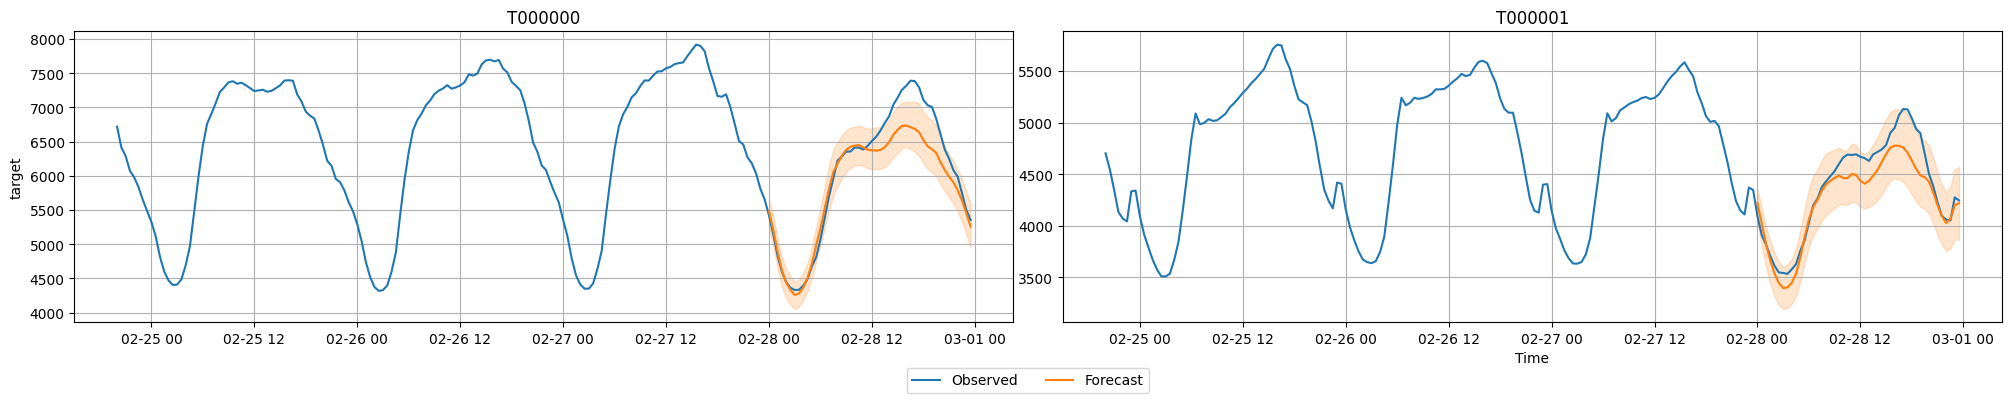

In [21]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

# Fine-Tuning

In [7]:
predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data=train_data,
    hyperparameters={
        "Chronos": [
            {"model_path": "bolt_small", "ag_args": {"name_suffix": "ZeroShot"}},
            {"model_path": "bolt_small", "fine_tune": True, "ag_args": {"name_suffix": "FineTuned"}},
        ]
    },
    time_limit=60,  # time limit in seconds
    enable_ensemble=False,
)

Beginning AutoGluon training... Time limit = 60s
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250509_103757'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       0.88 GB / 15.70 GB (5.6%)
Disk Space Avail:   79.76 GB / 475.50 GB (16.8%)

Fitting with arguments:
{'enable_ensemble': False,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': [{'ag_args': {'name_suffix': 'ZeroShot'},
                                  'model_path': 'bolt_small'},
                                 {'ag_args': {'name_suffix': 'FineTuned'},
                                  'fine_tune': True,
                                  'model_path': 'bolt_small'}]},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,

In [ ]:
predictor.leaderboard(test_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\metrics\abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attribute instead.
  warnings.warn(
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\metrics\abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attribute instead.
  warnings.warn(


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,ChronosFineTuned[bolt_small],-0.040169,-0.039707,0.488883,0.502086,51.989371,2
1,ChronosZeroShot[bolt_small],-0.041446,-0.041720,1.927625,1.198816,0.147036,1


# Eigener Test

In [54]:
data = TimeSeriesDataFrame.from_path(
    "TempEsslingen24Monate.csv"
)
data.head()

target
item_id timestamp         
2023    2023-05-01    13.8
        2023-06-01    18.8
        2023-07-01    16.1
        2023-08-01    16.0
        2023-09-01    13.5

In [17]:
prediction_length = 5
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data, presets="bolt_small",
)

Beginning AutoGluon training...
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250512_194913'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       0.70 GB / 15.70 GB (4.4%)
Disk Space Avail:   63.60 GB / 475.50 GB (13.4%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 5,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 7 rows, 2 time series. Median time 

Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]


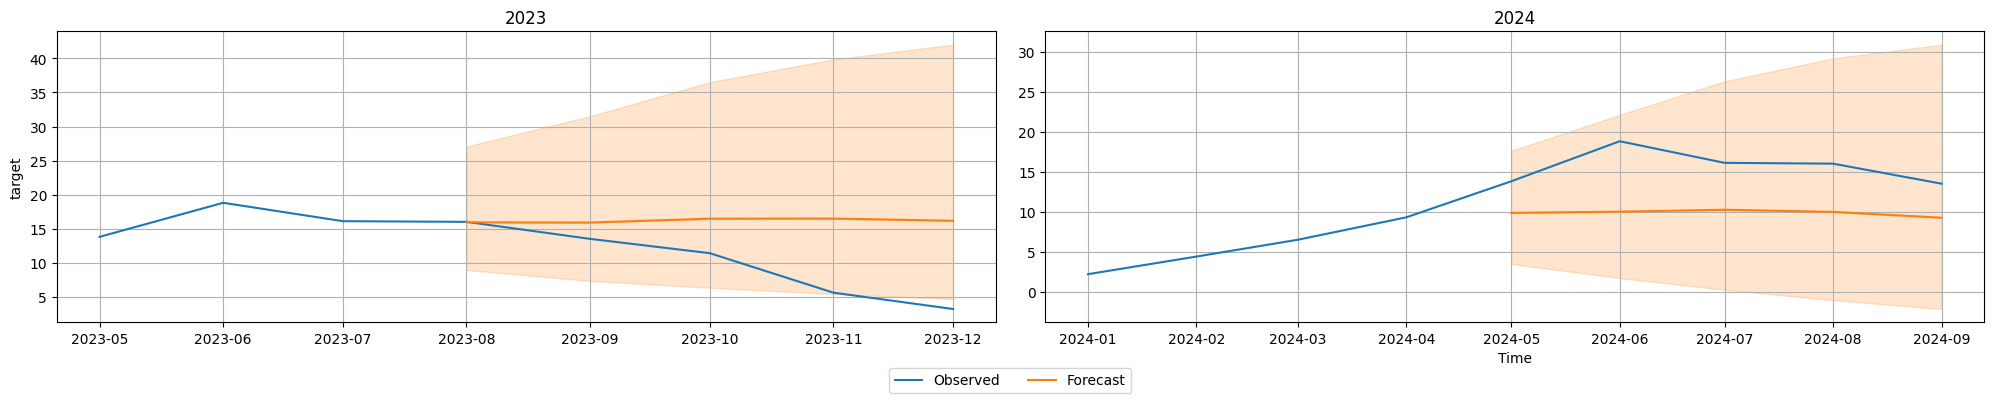

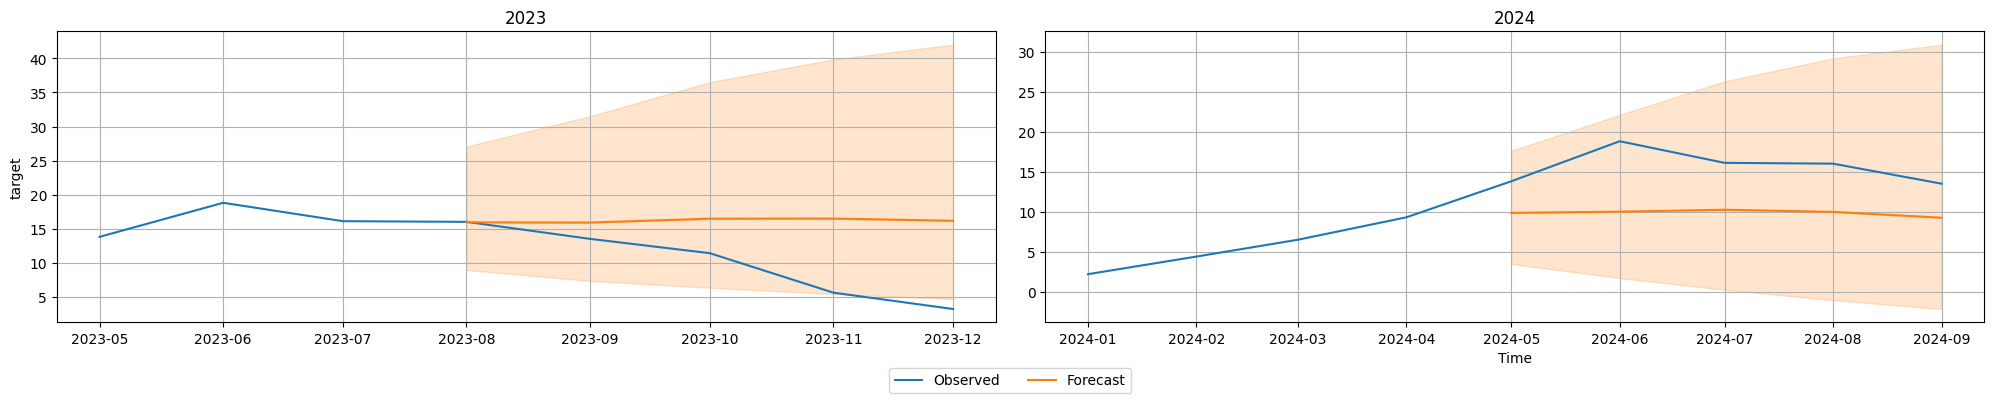

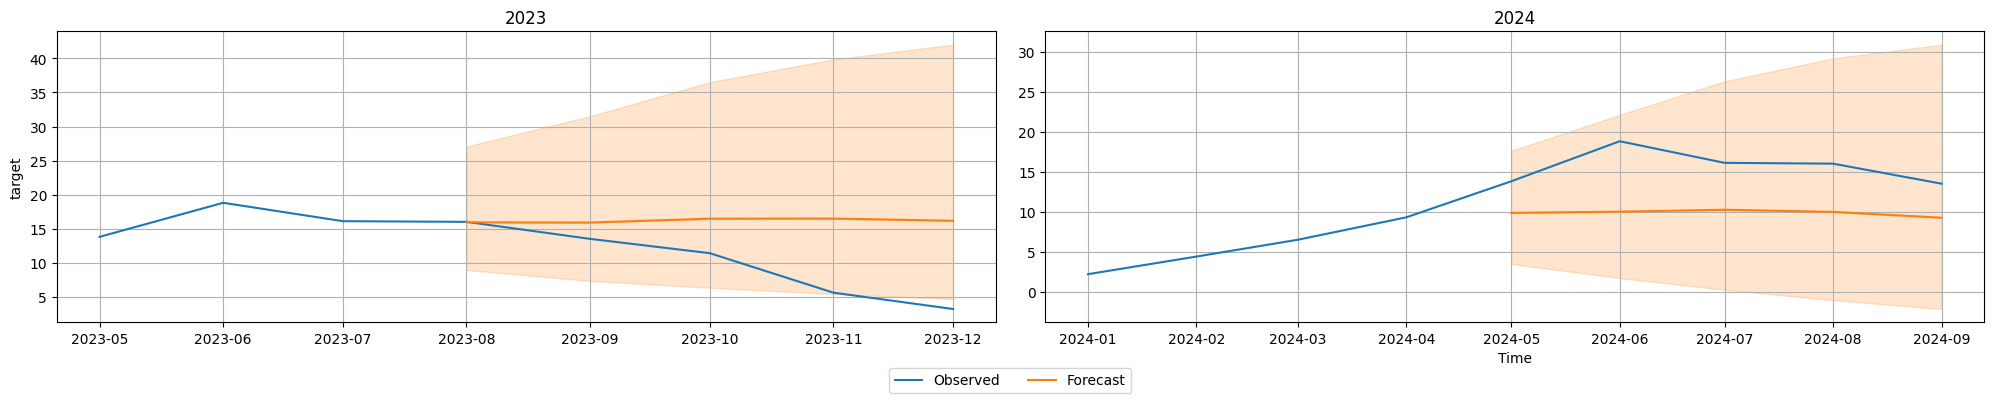

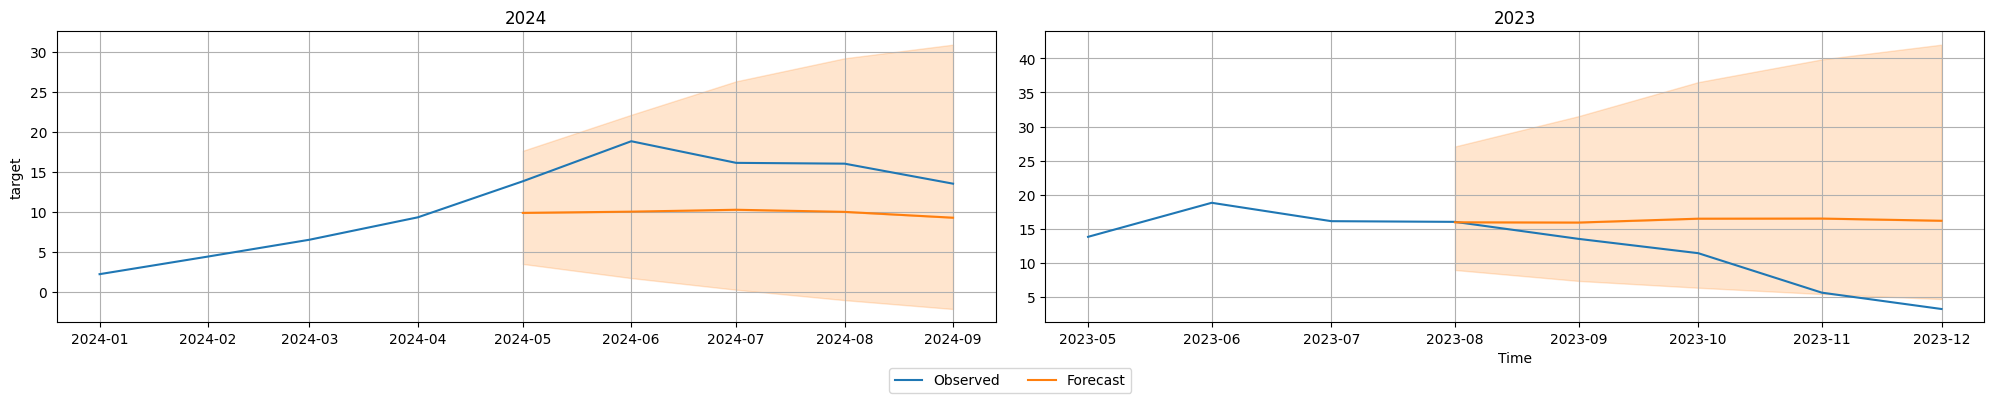

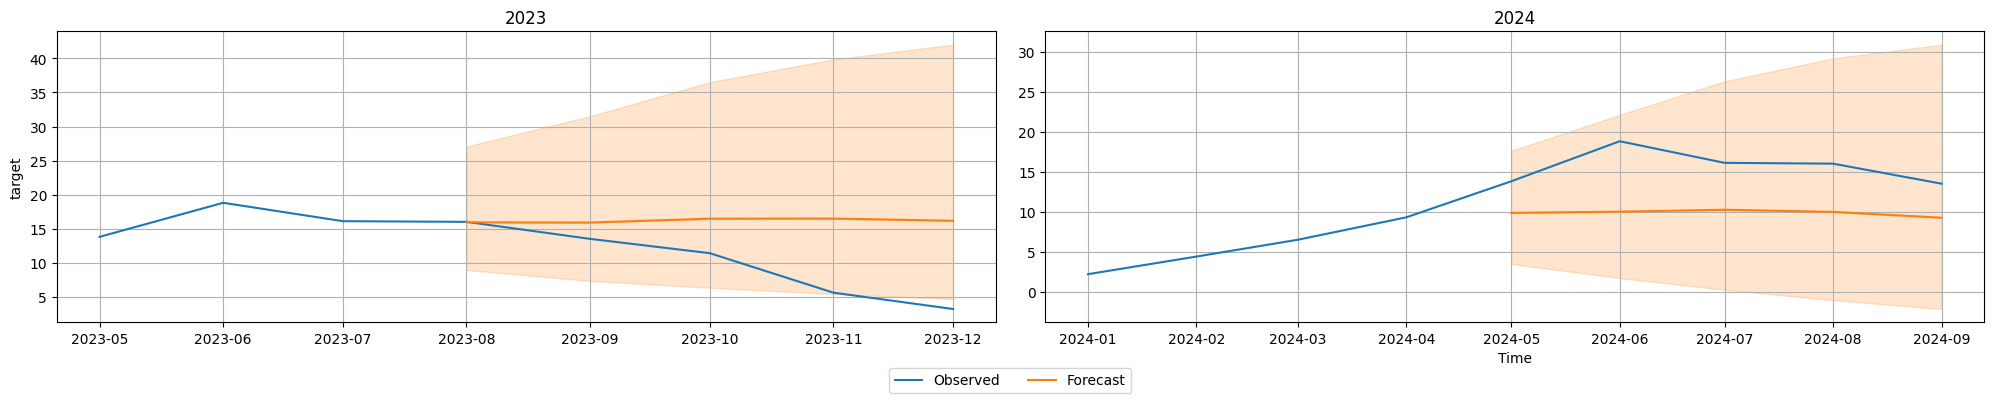

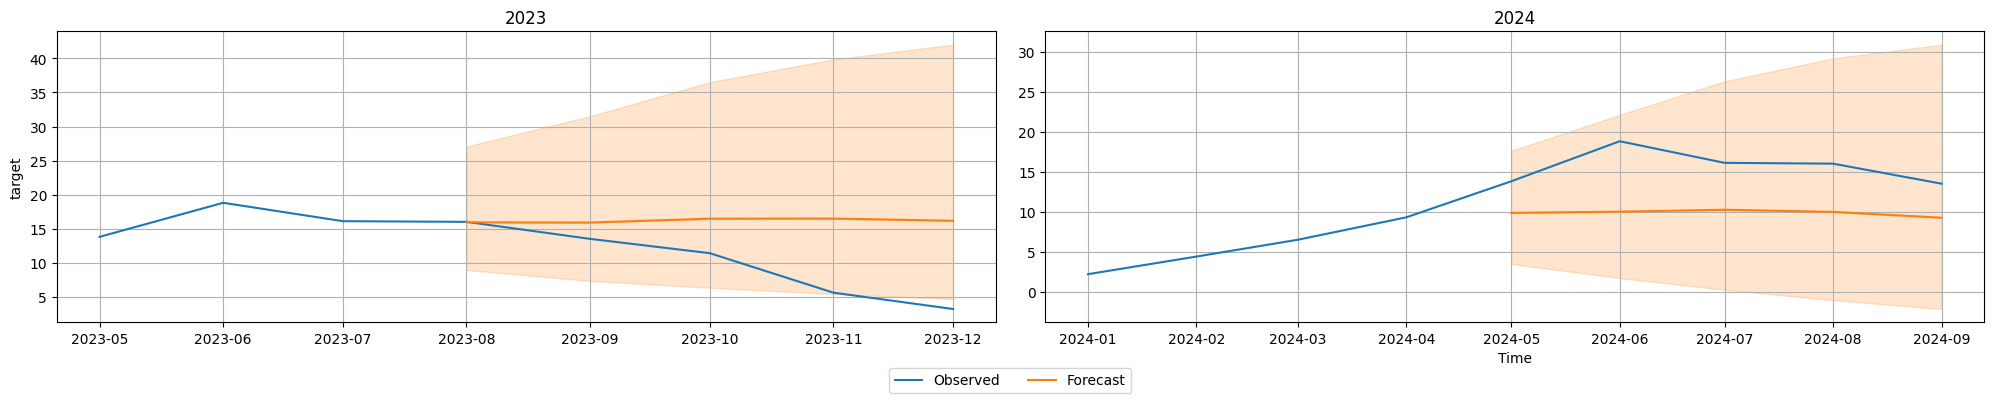

In [18]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

# Test Nummer 2

In [3]:
%matplotlib inline
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [63]:
data = TimeSeriesDataFrame.from_path(
    "climate-series.csv"
)
data.head()

target
item_id timestamp            
1       2017-01-01  15.913043
        2017-01-02  18.500000
        2017-01-03  17.111111
        2017-01-04  18.700000
        2017-01-05  18.388889

In [49]:
prediction_length = 5
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq="D").fit(
    train_data, presets="bolt_small",
)

Beginning AutoGluon training...
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250512_213733'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       0.45 GB / 15.70 GB (2.9%)
Disk Space Avail:   62.49 GB / 475.50 GB (13.1%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 5,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Provided train_data has 55 rows, 11 time series. Median time series length is 5 (m

In [52]:
predictions.head()

mean        0.1        0.2        0.3        0.4  \
item_id timestamp                                                           
1       2017-01-06  18.270176  15.807061  16.864096  17.472099  17.927408   
        2017-01-07  18.253557  15.243251  16.436893  17.182627  17.764219   
        2017-01-08  18.299177  14.800797  16.158428  17.011545  17.698420   
        2017-01-09  18.162014  14.359431  15.789549  16.730774  17.484278   
        2017-01-10  17.985020  14.058716  15.534587  16.488281  17.274284   

                          0.5        0.6        0.7        0.8        0.9  
item_id timestamp                                                          
1       2017-01-06  18.270176  18.606449  18.991049  19.641150  21.395891  
        2017-01-07  18.253557  18.689819  19.235075  20.154797  22.632589  
        2017-01-08  18.299177  18.885332  19.585228  20.803135  23.860834  
        2017-01-09  18.162014  18.838478  19.717041  21.184603  24.620815  
        2017-01-10  17.985020  18.740637  19.712021  21.415283  25.157494

Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]


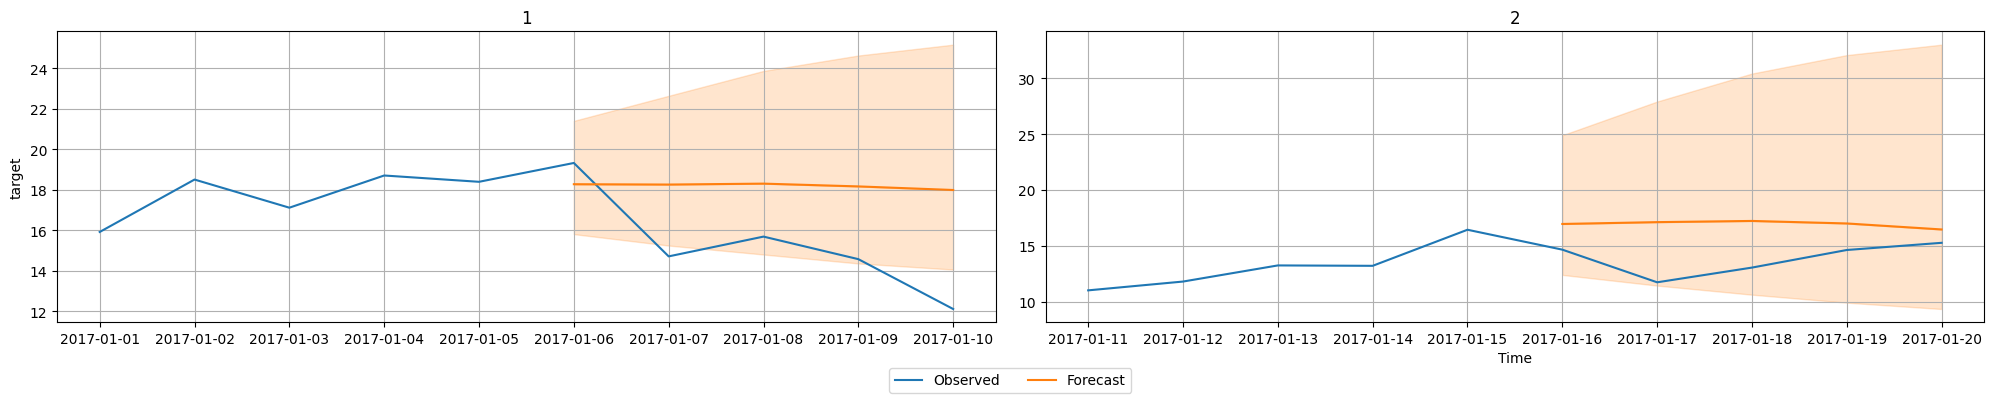

In [50]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

# Test Nummer 3

In [125]:
%matplotlib inline
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
import pandas as pd

In [72]:
df = pd.read_csv("neuTemp.csv")
df.head()

,item_id,timestamp,target
0,1,2022-05-01,14
1,1,2022-06-01,19
2,1,2022-07-01,16
3,1,2022-08-01,16
4,1,2022-09-01,14


In [80]:
data = TimeSeriesDataFrame.from_path(
    "neuTemp.csv"
)
data.head()

target
item_id timestamp         
1       2022-05-01      14
        2022-06-01      19
        2022-07-01      16
        2022-08-01      16
        2022-09-01      14

In [122]:
prediction_length = 5
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data, presets="bolt_small",
)

Beginning AutoGluon training...
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250514_170522'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       0.82 GB / 15.70 GB (5.2%)
Disk Space Avail:   56.37 GB / 475.50 GB (11.9%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 5,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 14 rows, 2 time series. Median time

Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]


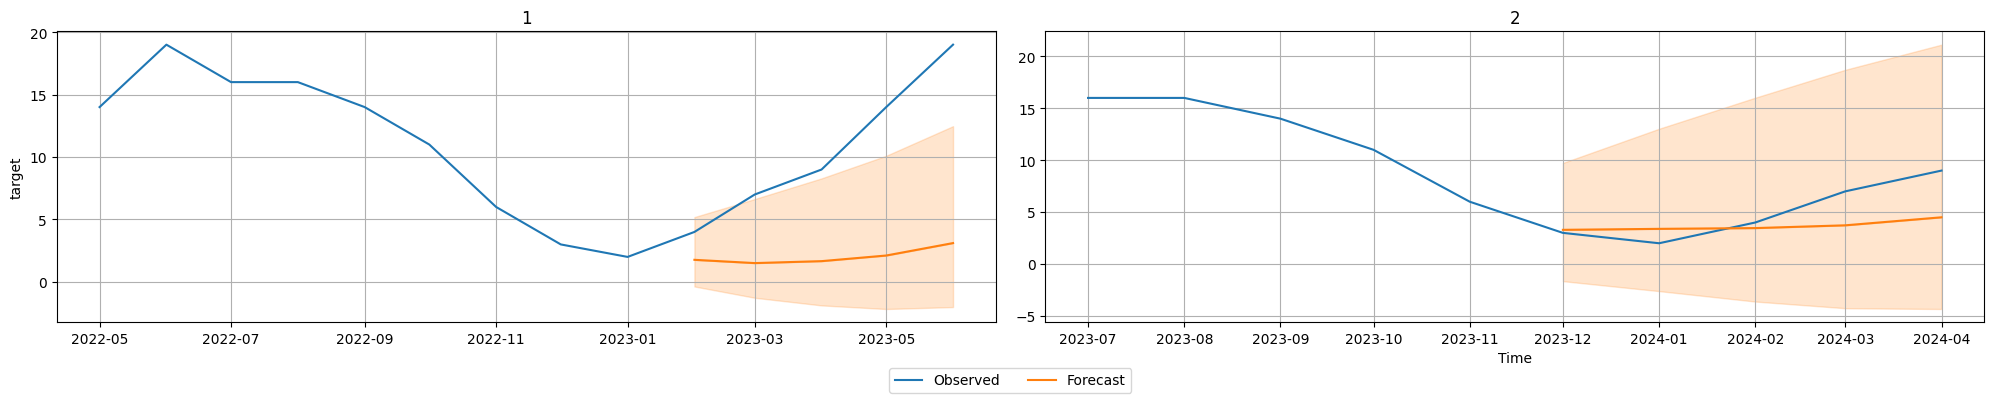

In [123]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

In [124]:
predictor.evaluate(test_data)

Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\metrics\abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attribute instead.
  warnings.warn(


{'WQL': np.float64(-0.5469985059863142)}

In [83]:
predictor.leaderboard(test_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\metrics\abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attribute instead.
  warnings.warn(


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,Chronos[bolt_small],-0.546999,None,0.992742,None,0.007045,1


In [111]:
len(data)
#data

24

In [109]:
len(train_data)
#train_data

14

In [110]:
len(test_data)
#test_data

24

In [ ]:
df = pd.read_csv("Temp-single.csv")
df.head()

,item_id,Monat,timestamp
0,1,2022-05-01,14
1,1,2022-06-01,19
2,1,2022-07-01,16
3,1,2022-08-01,16
4,1,2022-09-01,14


In [134]:
data = TimeSeriesDataFrame.from_path(
    "Temp-single.csv"
)
data.head()

target
item_id timestamp         
1       2022-05-01      14
        2022-06-01      19
        2022-07-01      16
        2022-08-01      16
        2022-09-01      14

In [135]:
prediction_length = 5
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data, presets="bolt_small",
)

Beginning AutoGluon training...
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250514_183846'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       0.61 GB / 15.70 GB (3.9%)
Disk Space Avail:   56.44 GB / 475.50 GB (11.9%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 5,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 19 rows, 1 time series. Median time

Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]


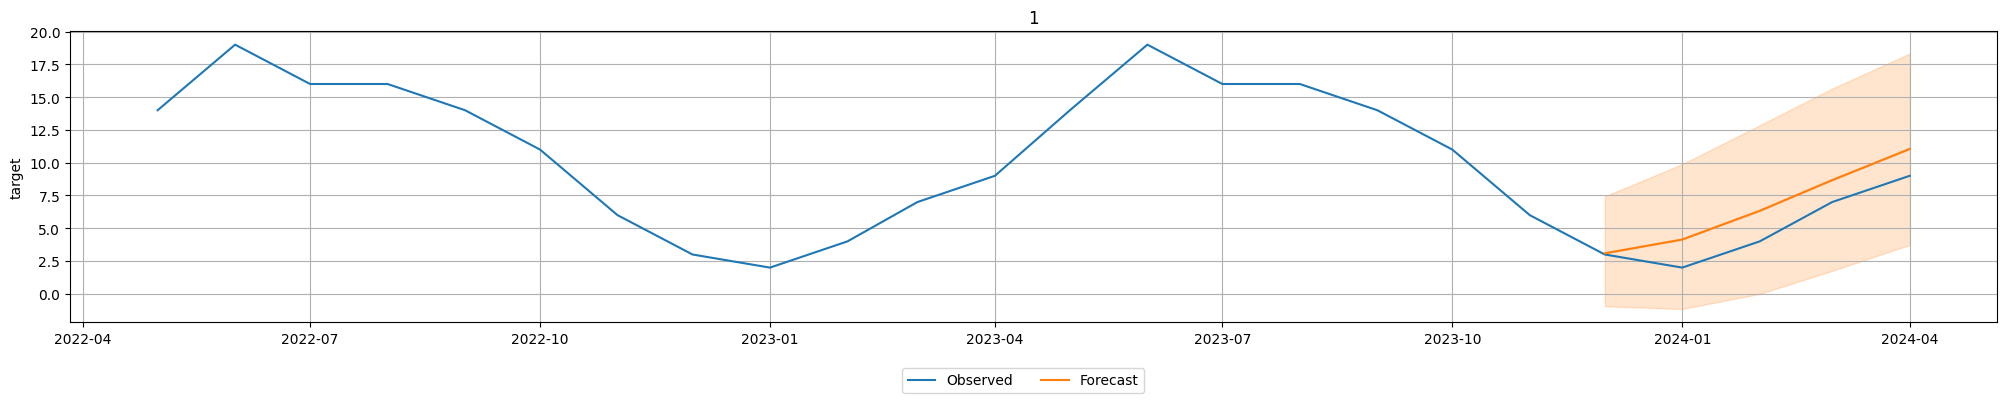

In [136]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

# Test mit größerem Datensatz

In [137]:
data = TimeSeriesDataFrame.from_path(
    "timeseries-temperature.csv"
)
data.head()

target
item_id timestamp                  
0       1980-01-01 00:00:00    12.7
        1980-01-01 01:00:00    12.9
        1980-01-01 02:00:00    13.2
        1980-01-01 03:00:00    15.9
        1980-01-01 04:00:00    19.4

In [144]:
prediction_length = 50
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data, presets="bolt_small",
)

Beginning AutoGluon training...
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250514_190101'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       0.81 GB / 15.70 GB (5.2%)
Disk Space Avail:   56.11 GB / 475.50 GB (11.8%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 50,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 389446 rows, 1 time series. Median 

Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]


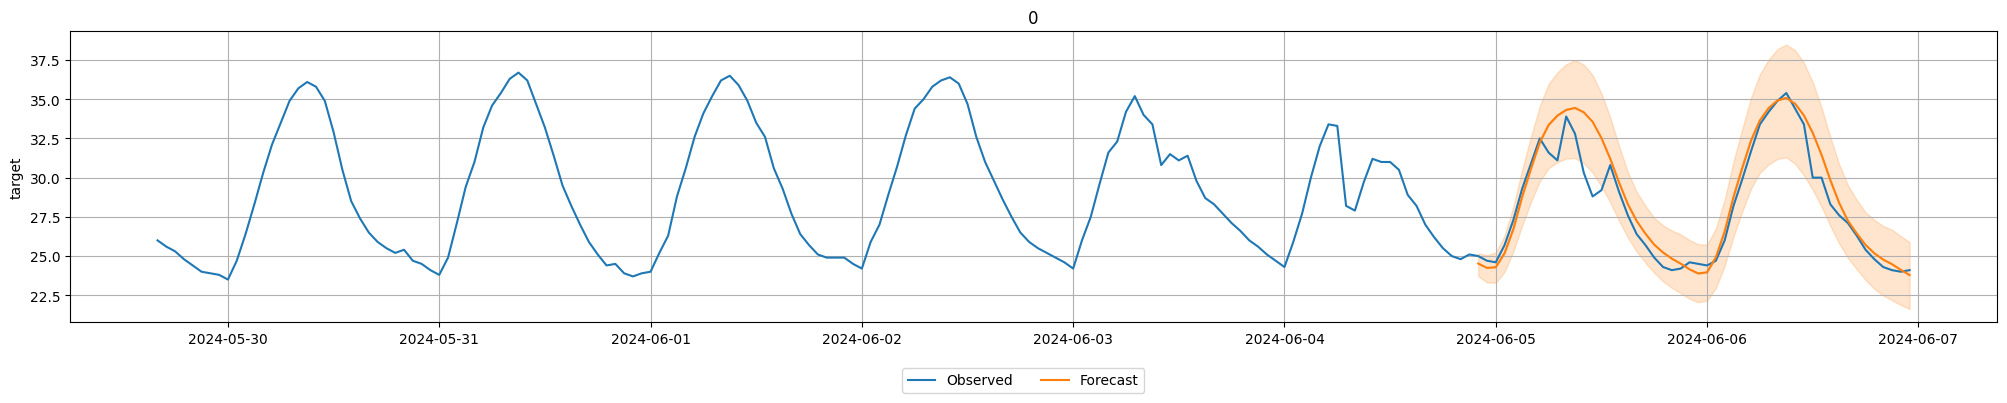

In [145]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

# Test mit Fake-Zahlen und verschiedenen Modellen

In [165]:
data = TimeSeriesDataFrame.from_path(
    "test1.csv"
)
data.head()

target
item_id timestamp         
1       2001-01-01     245
        2002-01-01     473
        2003-01-01     380
        2004-01-01     326
        2005-01-01     231

In [172]:
prediction_length = 5
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data, presets="medium_quality",
)

Beginning AutoGluon training...
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250514_211811'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       0.92 GB / 15.70 GB (5.9%)
Disk Space Avail:   52.99 GB / 475.50 GB (11.1%)
Setting presets to: medium_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 'light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 5,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'YS-JAN'
Provided train_data has 20 rows, 1 time series. Median time series length is 20 (min

Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]


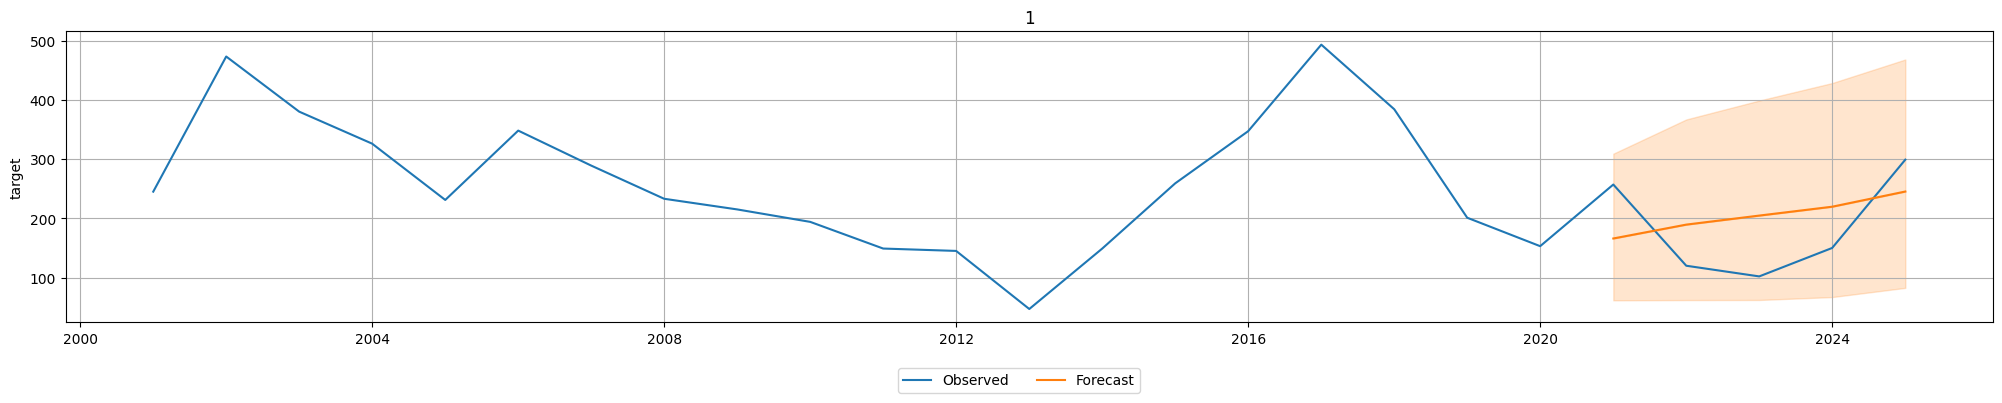

In [169]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]


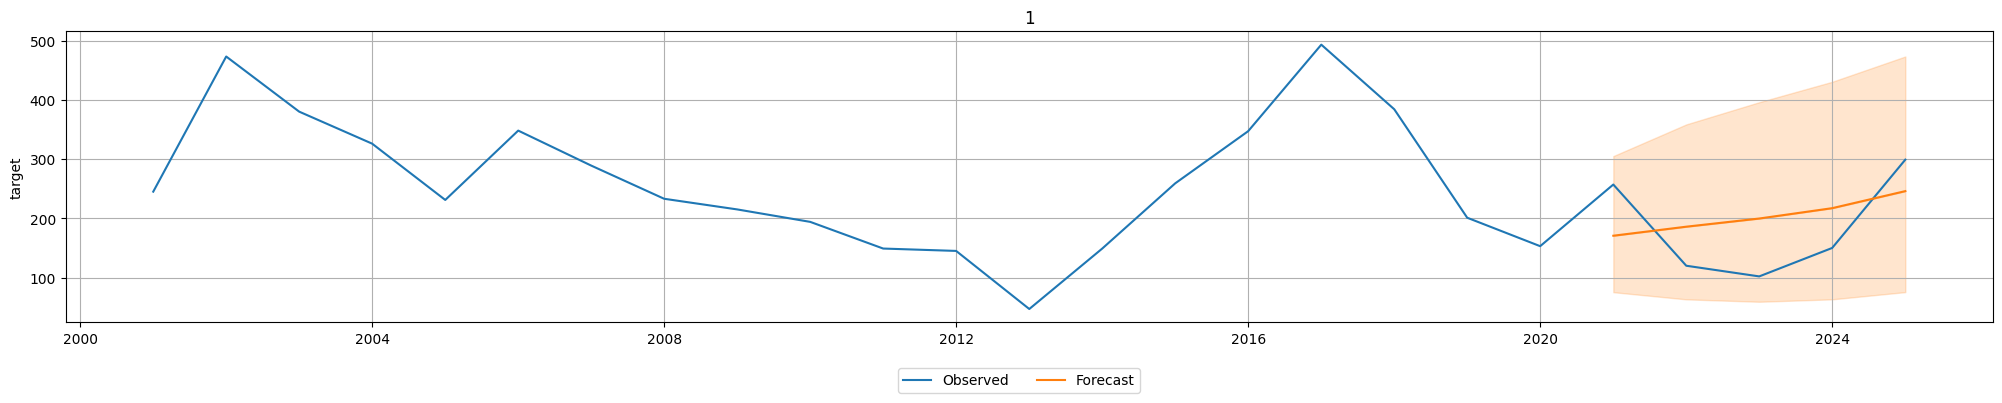

In [171]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


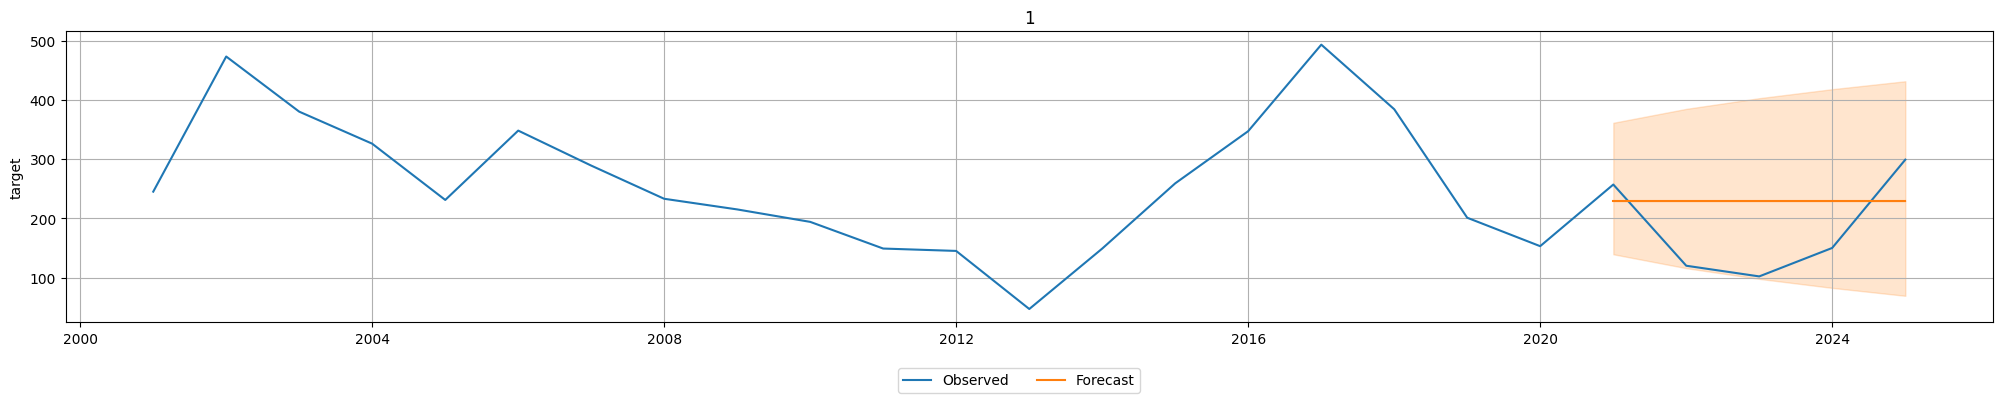

In [173]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

In [174]:
predictor.leaderboard(test_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\metrics\abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attribute instead.
  warnings.warn(
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\metrics\abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attribute instead.
  warnings.warn(
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\metrics\abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attri

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,Chronos[bolt_small],-0.292202,-0.293920,2.878300,1.765069,0.025259,7
1,WeightedEnsemble,-0.324664,-0.268111,0.259572,5.549798,4.438472,9
2,SeasonalNaive,-0.334080,-0.285982,0.021092,4.224698,0.019516,2
3,Naive,-0.334080,-0.285982,0.083400,5.495898,0.064658,1
4,ETS,-0.346348,-0.373264,0.136938,10.317066,0.012930,5
5,Theta,-0.348595,-0.482815,0.107023,4.590814,0.014161,6
6,RecursiveTabular,-0.362375,-0.293040,0.071170,0.061966,2.764651,3
7,TemporalFusionTransformer,-0.400225,-0.601920,0.090059,0.118076,215.377352,8
8,DirectTabular,-0.536206,-0.283777,0.175173,0.053900,0.693514,4


In [175]:
prediction_length = 5
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data, presets="high_quality",
)

Beginning AutoGluon training...
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250514_213527'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       4.76 GB / 15.70 GB (30.3%)
Disk Space Avail:   54.29 GB / 475.50 GB (11.4%)
Setting presets to: high_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 5,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'YS-JAN'
Provided train_data has 20 rows, 1 time series. Median time series length is 20 (mi

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


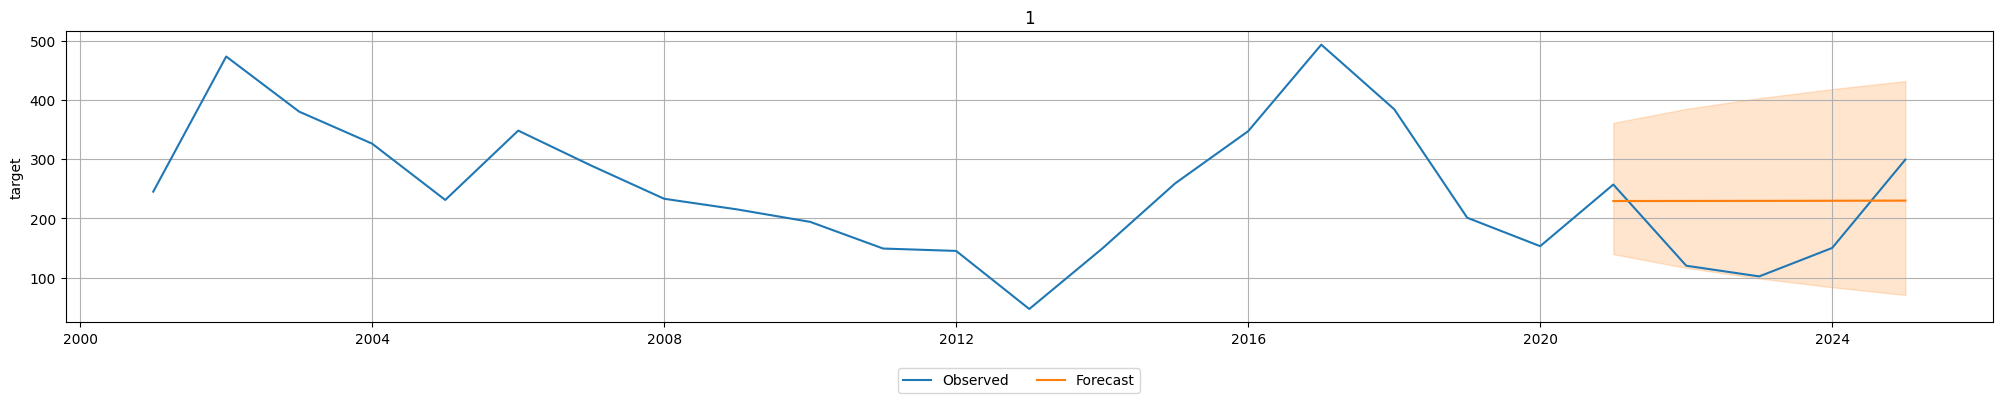

In [176]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

In [177]:
predictor.leaderboard(test_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\metrics\abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attribute instead.
  warnings.warn(
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\metrics\abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attribute instead.
  warnings.warn(
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\metrics\abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attri

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,TiDE,-0.226532,-0.636070,0.416379,0.029597,186.119824,12
1,ChronosFineTuned[bolt_small],-0.278585,-0.515467,1.661761,0.038907,450.960366,8
2,ChronosZeroShot[bolt_base],-0.283172,-0.282344,1.157771,2.129973,0.014537,7
3,DeepAR,-0.321739,-0.452818,0.121399,0.036827,28.424531,10
4,WeightedEnsemble,-0.324797,-0.268130,3.227348,5.182545,1.787802,13
5,PatchTST,-0.330203,-0.552123,0.122495,0.020688,28.080318,11
6,DynamicOptimizedTheta,-0.333842,-0.346603,8.996473,2.738819,0.012408,5
7,SeasonalNaive,-0.334080,-0.285982,2.026343,3.016013,0.019631,1
8,AutoETS,-0.346348,-0.373264,18.969357,2.531369,0.011235,6
9,RecursiveTabular,-0.362375,-0.293040,0.215216,0.042272,0.663059,2


# Ermittlung der Mindestgröße des Datensatzes

In [19]:
data = TimeSeriesDataFrame.from_path(
    "test1.csv"
)
data.head()

target
item_id timestamp         
1       1960-01-01     172
        1961-01-01     199
        1962-01-01     312
        1963-01-01     287
        1964-01-01     275

In [22]:
prediction_length = 5
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data, presets="bolt_small",
)

Beginning AutoGluon training...
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250515_111756'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       3.27 GB / 15.70 GB (20.9%)
Disk Space Avail:   71.56 GB / 475.50 GB (15.0%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 5,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'YS-JAN'
Provided train_data has 61 rows, 1 time series. Median

Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]


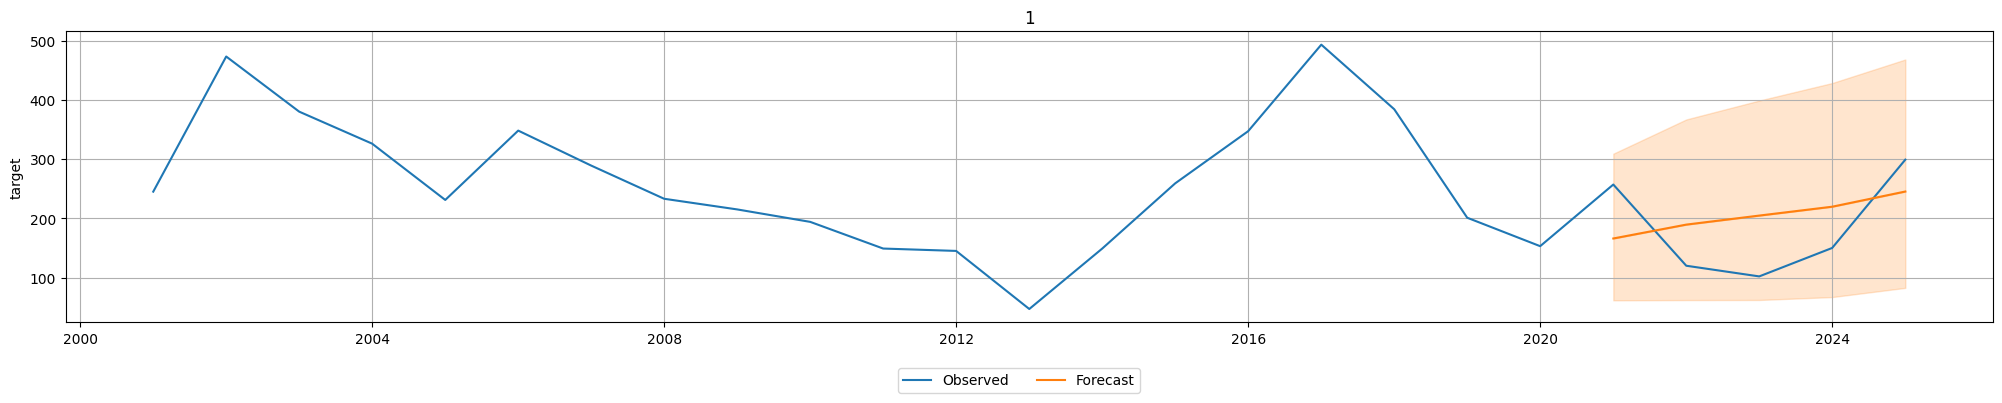

In [6]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

Folgend mit 45 künstliche erzeugten Datensätzen

Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]


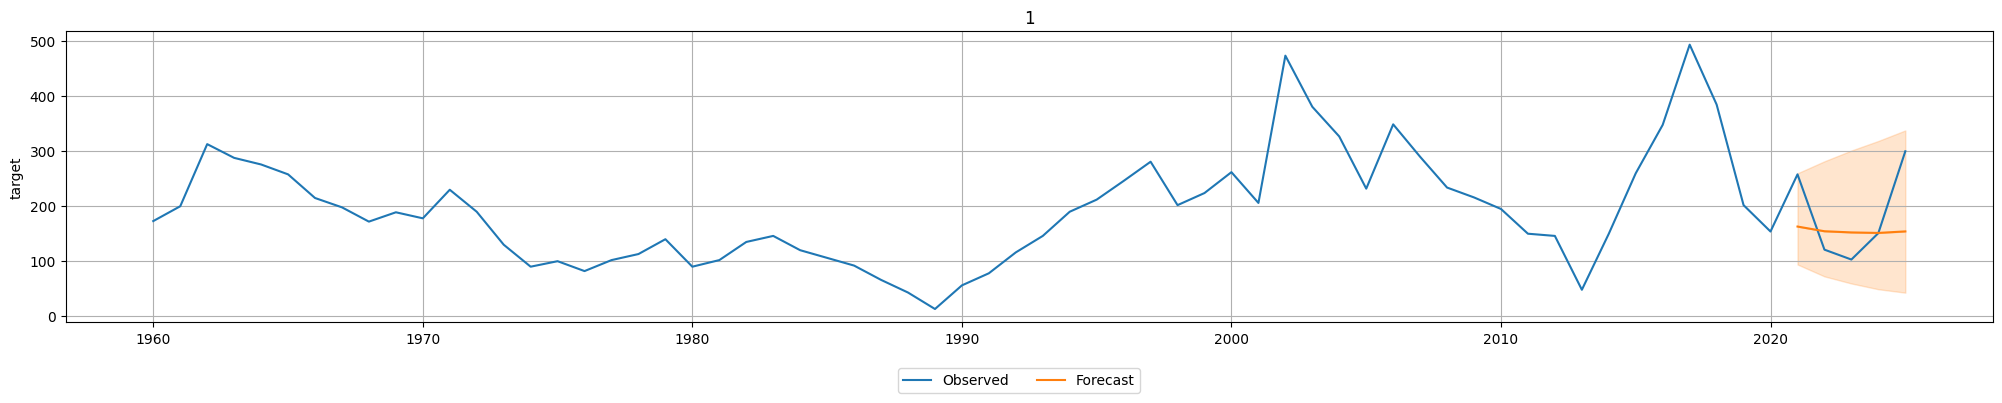

In [23]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

Größer des PKS-Datensatzes nicht ausreichend..

# Suche nach Alternativen - Deutsche Bahn Datensatz

In [239]:
data = TimeSeriesDataFrame.from_path(
    "timeseries-rb75.csv"
)
data.head()

target
item_id timestamp                  
RB75    2024-07-08 06:12:00       0
        2024-07-08 05:38:00       0
        2024-07-08 06:12:00       1
        2024-07-08 07:12:00       0
        2024-07-08 06:38:00       0

In [95]:
import pandas as pd

In [141]:
df = pd.read_csv("timeseries-rb75.csv")
df.head()

,item_id,target,timestamp
0,RB75,0,2024-07-08
1,RB75,0,2024-07-08
2,RB75,1,2024-07-08
3,RB75,0,2024-07-08
4,RB75,0,2024-07-08


In [104]:
print(df.isnull().sum())


item_id      0
target       0
timestamp    0
dtype: int64


In [242]:
prediction_length = 20
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq="h").fit(
    train_data, presets="bolt_base", hyperparameters={"Chronos": {"fine_tune": True, "fine_tune_lr": 1e-3, "fine_tune_steps": 1000}},
)

Sorting the dataframe index before generating the train/test split.
Beginning AutoGluon training...
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250516_173016'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       1.32 GB / 15.70 GB (8.4%)
Disk Space Avail:   52.31 GB / 475.50 GB (11.0%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'h',
 'hyperparameters': {'Chronos': {'fine_tune': True,
                                 'fine_tune_lr': 0.001,
                                 'fine_tune_steps': 1000}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 20,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 

data with frequency 'IRREG' has been resampled to frequency 'h'.
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
data with frequency 'IRREG' has been resampled to frequency 'h'.


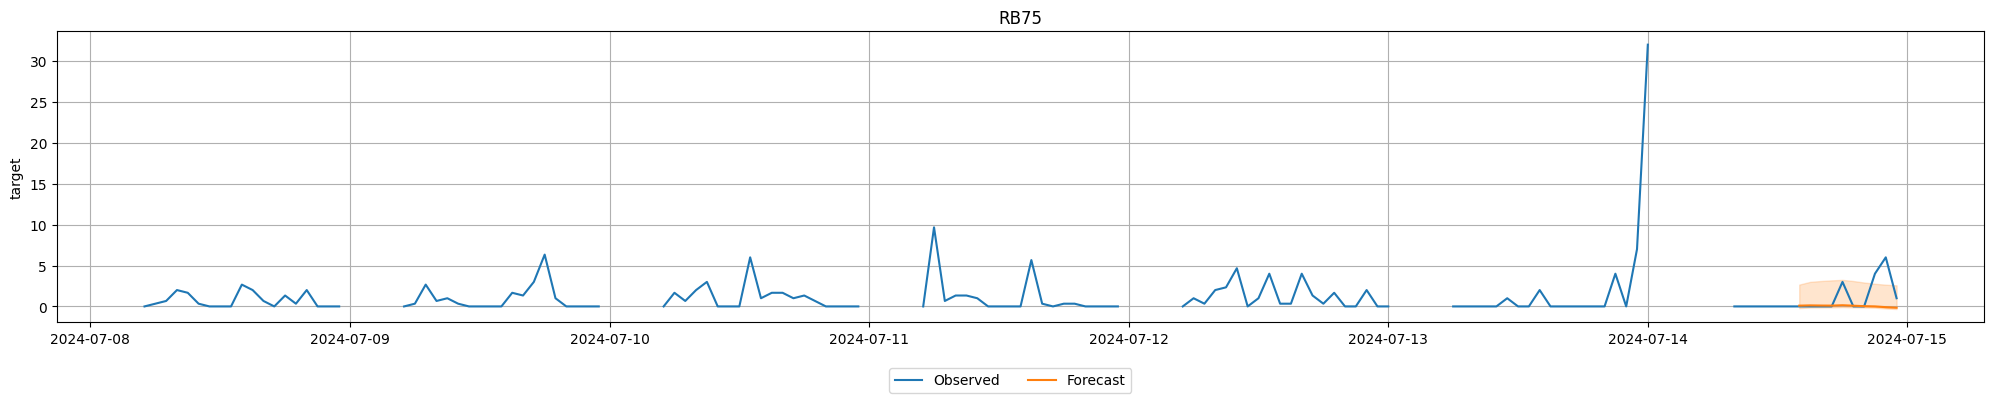

In [241]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

data with frequency 'IRREG' has been resampled to frequency 'h'.
Model not specified in predict, will default to the model with the best validation score: Chronos[autogluon__chronos-bolt-small]
data with frequency 'IRREG' has been resampled to frequency 'h'.


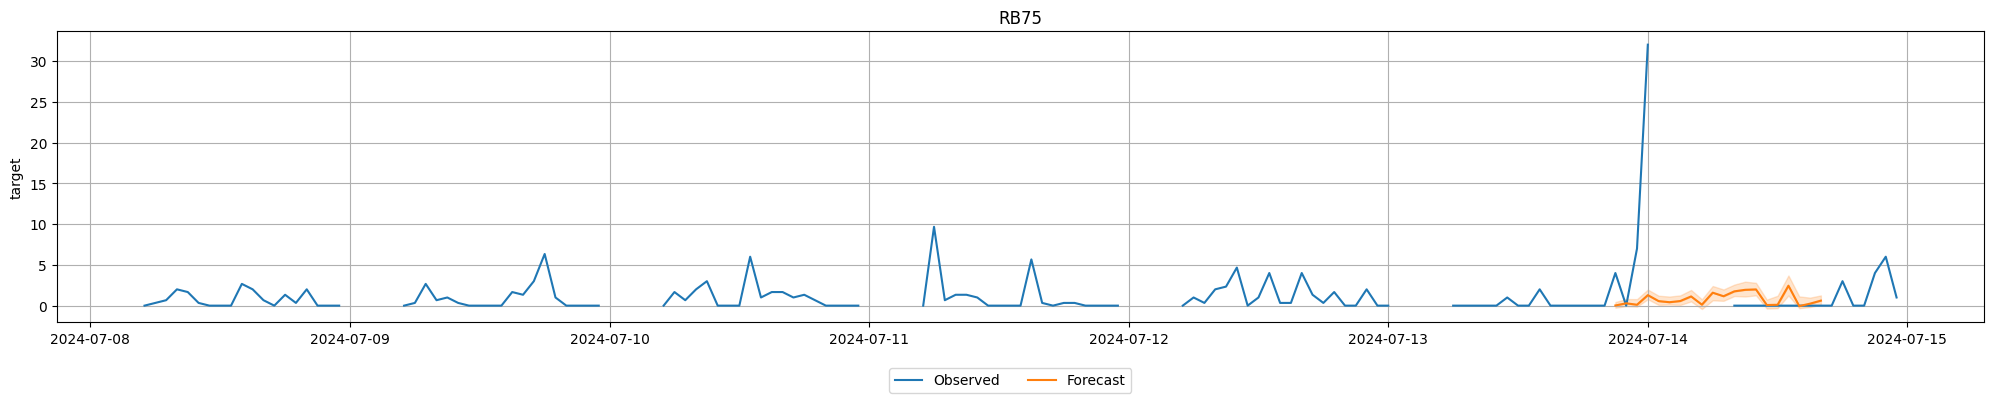

In [243]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

data with frequency 'IRREG' has been resampled to frequency 'h'.
Model not specified in predict, will default to the model with the best validation score: Chronos[autogluon__chronos-bolt-small]
data with frequency 'IRREG' has been resampled to frequency 'h'.


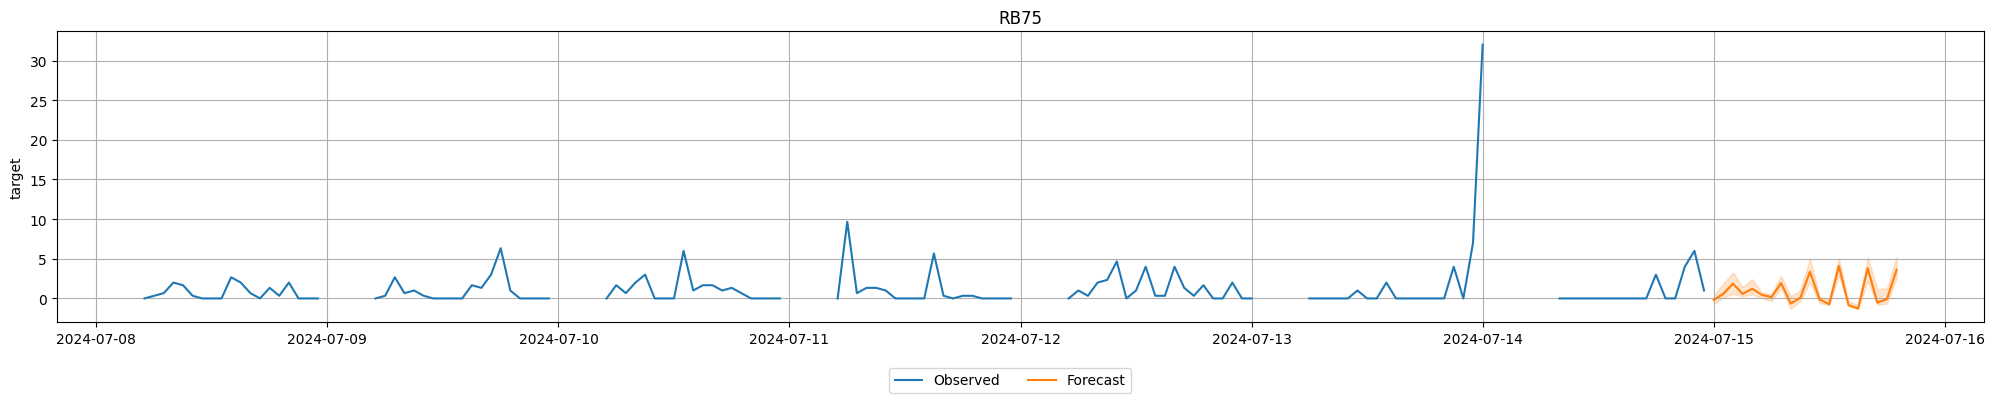

In [244]:
predictions = predictor.predict(test_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

# Suche nach Alternative - Netflix Stock Price

In [137]:
data = TimeSeriesDataFrame.from_path(
    "nflx.csv"
)
data.head()

target
item_id timestamp             
0       2018-02-05  254.259995
        2018-02-06  265.720001
        2018-02-07  264.559998
        2018-02-08  250.100006
        2018-02-09  249.470001

In [139]:
prediction_length = 5
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq="W").fit(
    train_data, presets="bolt_small",
)

Frequency 'W' stored as 'W-SUN'
Beginning AutoGluon training...
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250515_192825'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       1.93 GB / 15.70 GB (12.3%)
Disk Space Avail:   61.71 GB / 475.50 GB (13.0%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 5,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'IRREG' has been re

data with frequency 'IRREG' has been resampled to frequency 'W-SUN'.
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
data with frequency 'IRREG' has been resampled to frequency 'W-SUN'.


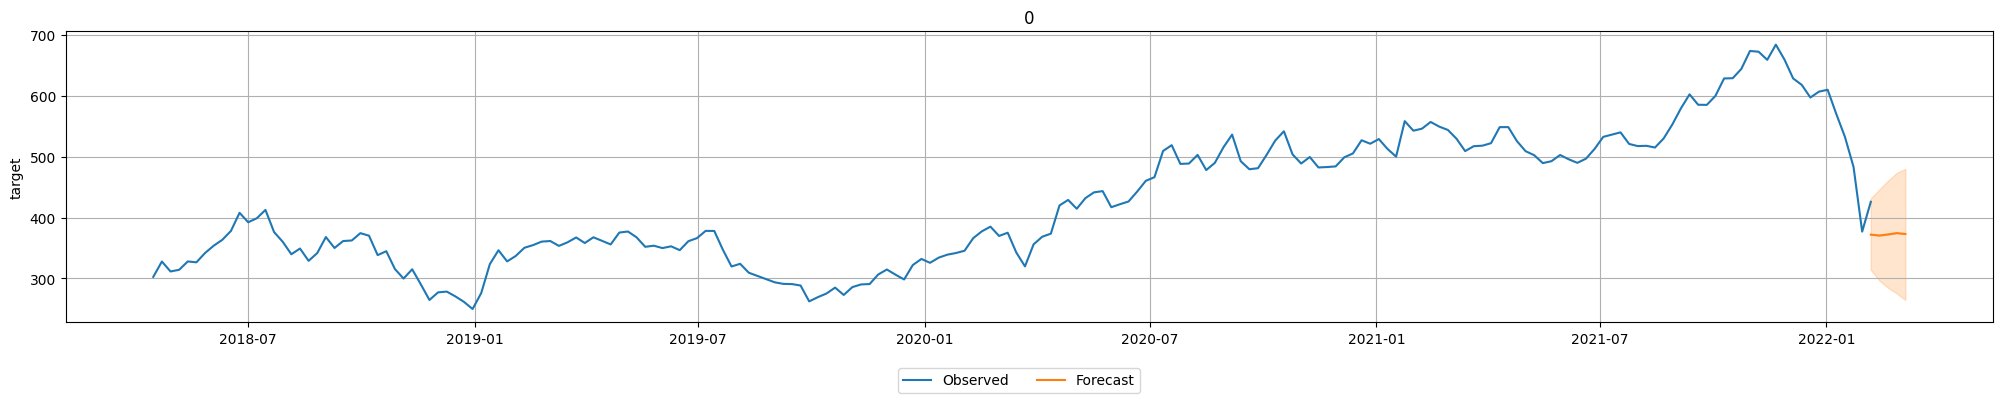

In [140]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

# Suche nach Alternative - Gold Prices for 5 years

In [134]:
data = TimeSeriesDataFrame.from_path(
    "gold.csv"
)
data.head()

target
item_id timestamp             
0       2019-11-11  137.059998
        2019-11-12  137.429993
        2019-11-13  137.979996
        2019-11-14  138.559998
        2019-11-15  138.210007

In [135]:
prediction_length = 5
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq="W").fit(
    train_data, presets="bolt_small",
)

Frequency 'W' stored as 'W-SUN'
Beginning AutoGluon training...
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250515_192754'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       1.85 GB / 15.70 GB (11.8%)
Disk Space Avail:   61.71 GB / 475.50 GB (13.0%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 5,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'IRREG' has been re

data with frequency 'IRREG' has been resampled to frequency 'W-SUN'.
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
data with frequency 'IRREG' has been resampled to frequency 'W-SUN'.


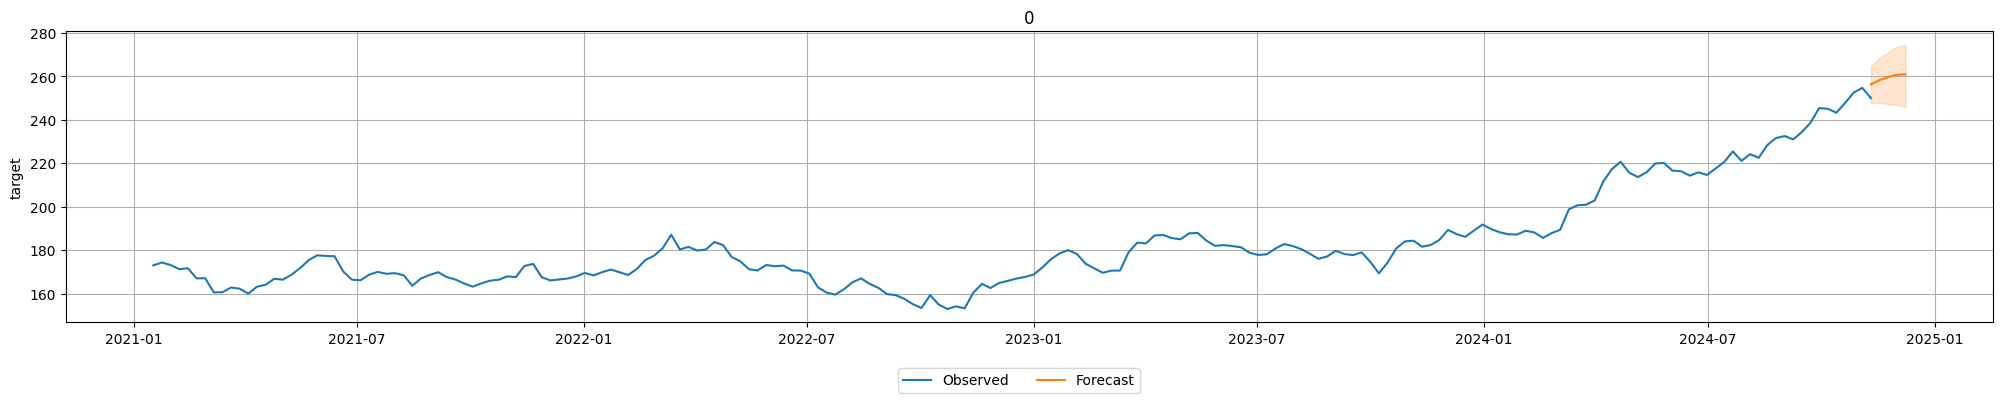

In [136]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

# Test Google Stock

In [122]:
data = TimeSeriesDataFrame.from_path(
    "GOOG.csv"
)
data.head()

target
item_id timestamp         
0       2016-06-14  718.27
        2016-06-15  718.92
        2016-06-16  710.36
        2016-06-17  691.72
        2016-06-20  693.71

In [159]:
prediction_length = 5
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq="D").fit(
    train_data, presets="bolt_small",
)

Beginning AutoGluon training...
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250515_193354'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       2.05 GB / 15.70 GB (13.1%)
Disk Space Avail:   61.69 GB / 475.50 GB (13.0%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 5,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'IRREG' has been resampled to frequency 'D'.
Provided t

data with frequency 'IRREG' has been resampled to frequency 'D'.
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
data with frequency 'IRREG' has been resampled to frequency 'D'.


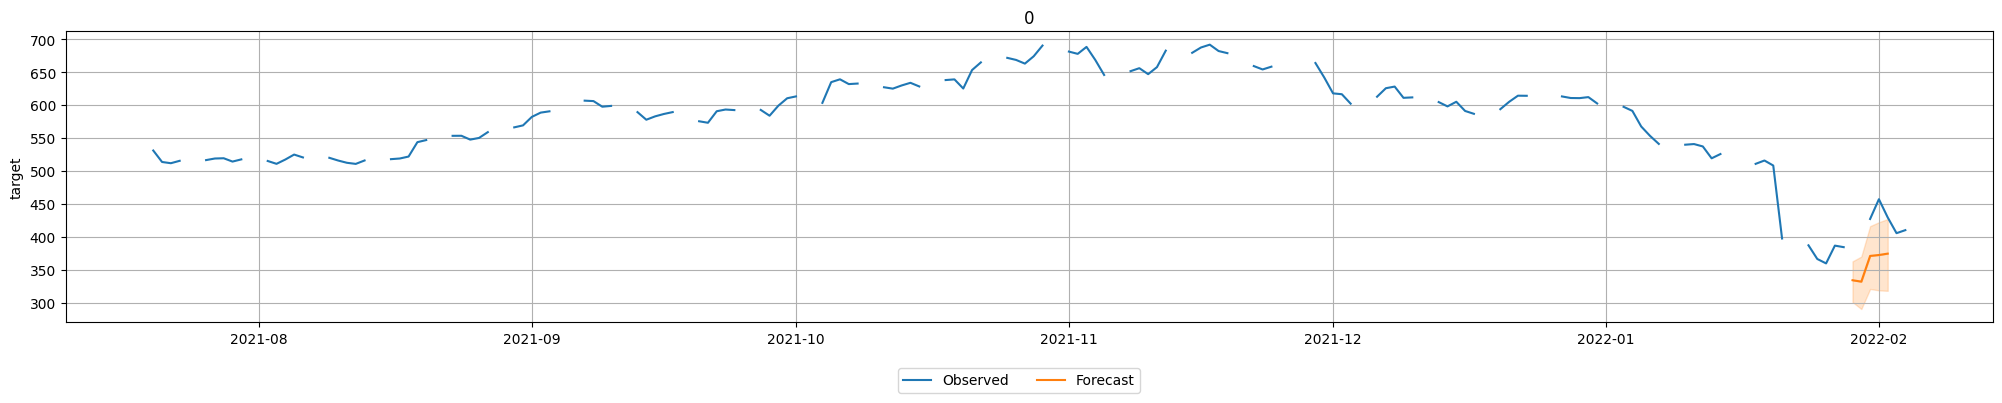

In [168]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

In [172]:
predictions

mean         0.1         0.2         0.3  \
item_id timestamp                                                    
0       2022-01-29  334.178040  301.099304  313.859009  322.326782   
        2022-01-30  332.058075  290.497803  305.917023  316.288605   
        2022-01-31  371.071045  320.896271  339.153198  351.759369   
        2022-02-01  372.468811  318.807434  338.229828  351.842987   
        2022-02-02  374.559692  318.102356  338.625183  352.743530   

                           0.4         0.5         0.6         0.7  \
item_id timestamp                                                    
0       2022-01-29  328.588715  334.178040  339.662537  345.126709   
        2022-01-30  324.712036  332.058075  339.565796  346.976105   
        2022-01-31  361.911865  371.071045  379.901337  389.201508   
        2022-02-01  362.625610  372.468811  382.043762  392.119995   
        2022-02-02  364.236603  374.559692  384.747040  395.510712   

                           0.8         0.9  
item_id timestamp                           
0       2022-01-29  351.885254  362.790771  
        2022-01-30  356.170624  370.048798  
        2022-01-31  399.928986  416.229889  
        2022-02-01  404.212341  422.175446  
        2022-02-02  407.937134  427.023285

# Fine-Tuning-Test with Google Stock

In [174]:
data = TimeSeriesDataFrame.from_path(
    "GOOG.csv"
)
data.head()

target
item_id timestamp         
0       2016-06-14  718.27
        2016-06-15  718.92
        2016-06-16  710.36
        2016-06-17  691.72
        2016-06-20  693.71

In [176]:
predictor = TimeSeriesPredictor(prediction_length=48, eval_metric="MASE", freq="D").fit(
    train_data,
    hyperparameters={
        "Chronos": [
            {"model_path": "bolt_small", "ag_args": {"name_suffix": "ZeroShot"}},
            {"model_path": "bolt_small", "fine_tune": True, "ag_args": {"name_suffix": "FineTuned"}},
        ]
    },
    enable_ensemble=False,
    time_limit=600,
)

Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250515_194538'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       2.32 GB / 15.70 GB (14.8%)
Disk Space Avail:   61.63 GB / 475.50 GB (13.0%)

Fitting with arguments:
{'enable_ensemble': False,
 'eval_metric': MASE,
 'freq': 'D',
 'hyperparameters': {'Chronos': [{'ag_args': {'name_suffix': 'ZeroShot'},
                                  'model_path': 'bolt_small'},
                                 {'ag_args': {'name_suffix': 'FineTuned'},
                                  'fine_tune': True,
                                  'model_path': 'bolt_small'}]},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.

In [177]:
predictor.leaderboard(test_data)

data with frequency 'IRREG' has been resampled to frequency 'D'.
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\metrics\abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attribute instead.
  warnings.warn(
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\metrics\abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attribute instead.
  warnings.warn(


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,ChronosZeroShot[bolt_small],-5.751674,-5.246773,2.551792,1.047565,0.018256,1
1,ChronosFineTuned[bolt_small],-8.433834,-7.807074,0.378024,0.245655,482.124624,2


data with frequency 'IRREG' has been resampled to frequency 'D'.
Model not specified in predict, will default to the model with the best validation score: ChronosZeroShot[bolt_small]
data with frequency 'IRREG' has been resampled to frequency 'D'.


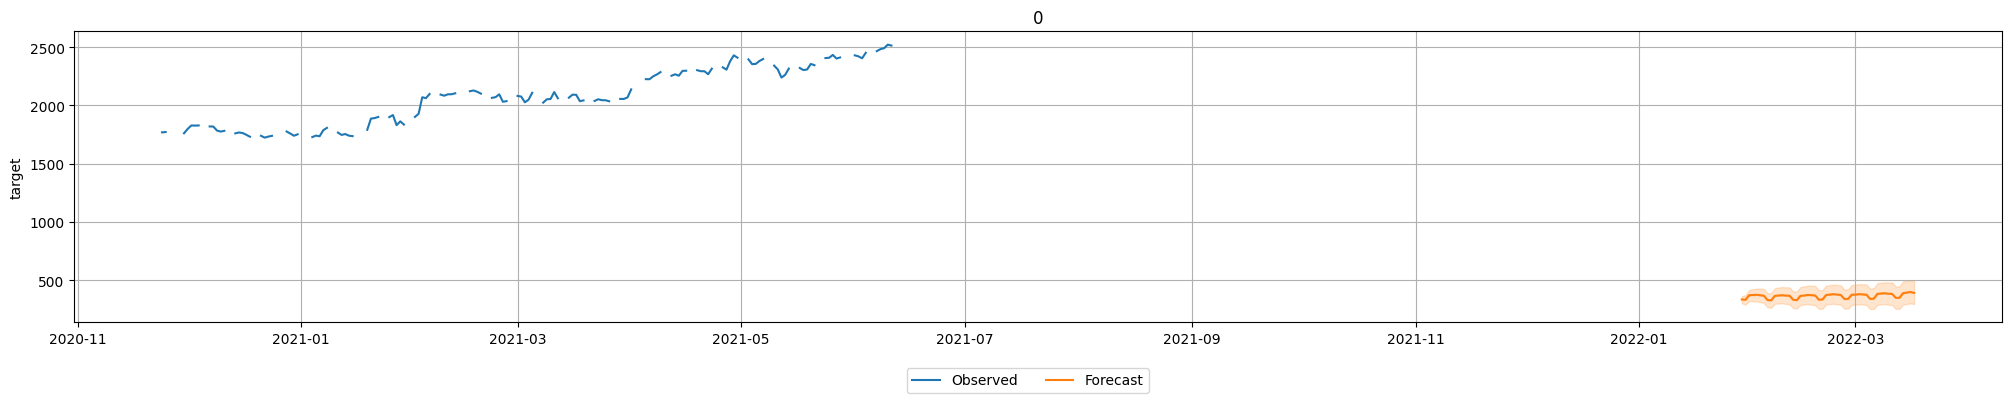

In [178]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

# Test Wind Power in Germany

In [179]:
data = TimeSeriesDataFrame.from_path(
    "wind-pwr.csv"
)
data.head()

target
item_id timestamp                  
0       2011-01-01 00:00:00  3416.0
        2011-01-01 00:15:00  4755.0
        2011-01-01 00:30:00  4939.0
        2011-01-01 00:45:00  4939.0
        2011-01-01 01:00:00  4998.0

In [187]:
prediction_length = 50
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq="H").fit(
    train_data, presets="bolt_small",
)

c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\predictor.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(self.freq)
Frequency 'H' stored as 'h'
Beginning AutoGluon training...
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250515_202111'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       1.93 GB / 15.70 GB (12.3%)
Disk Space Avail:   61.29 GB / 475.50 GB (12.9%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'h',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 50,
 'quantile_leve

data with frequency 'IRREG' has been resampled to frequency 'h'.
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
data with frequency 'IRREG' has been resampled to frequency 'h'.


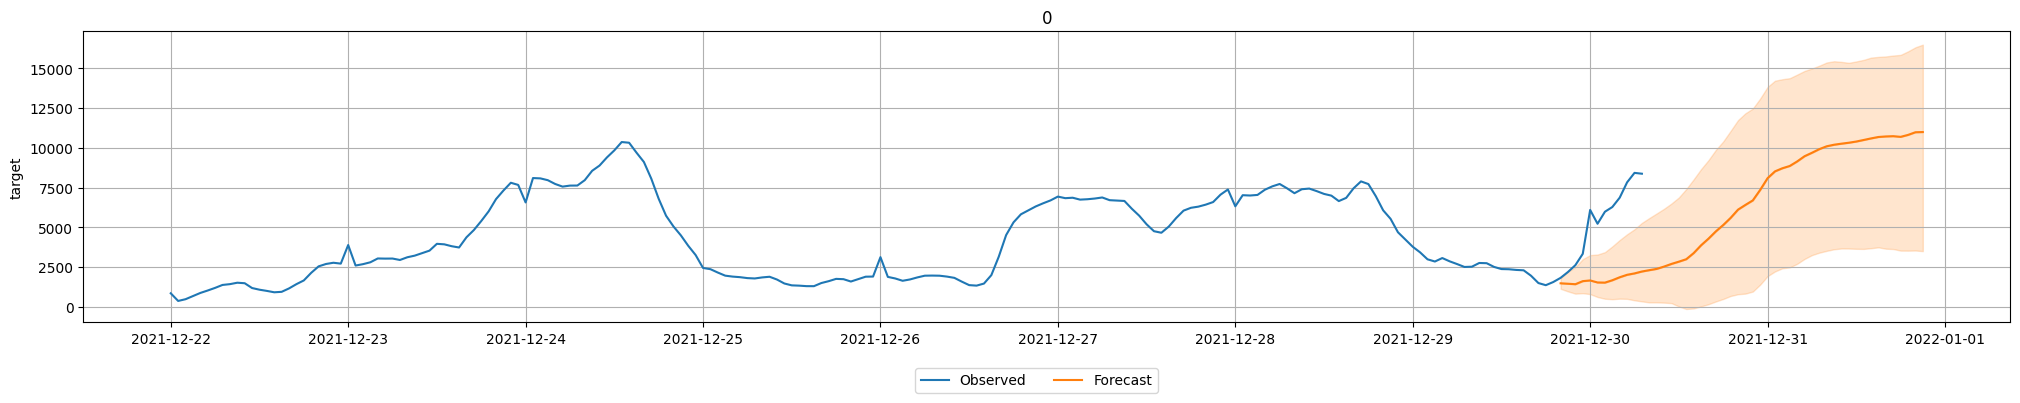

In [188]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

In [189]:
predictor = TimeSeriesPredictor(prediction_length=48, eval_metric="MASE", freq="h").fit(
    train_data,
    hyperparameters={
        "Chronos": [
            {"model_path": "bolt_small", "ag_args": {"name_suffix": "ZeroShot"}},
            {"model_path": "bolt_small", "fine_tune": True, "ag_args": {"name_suffix": "FineTuned"}},
        ]
    },
    enable_ensemble=False,
    time_limit=900,
)

Beginning AutoGluon training... Time limit = 900s
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250515_202133'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       1.94 GB / 15.70 GB (12.4%)
Disk Space Avail:   61.29 GB / 475.50 GB (12.9%)

Fitting with arguments:
{'enable_ensemble': False,
 'eval_metric': MASE,
 'freq': 'h',
 'hyperparameters': {'Chronos': [{'ag_args': {'name_suffix': 'ZeroShot'},
                                  'model_path': 'bolt_small'},
                                 {'ag_args': {'name_suffix': 'FineTuned'},
                                  'fine_tune': True,
                                  'model_path': 'bolt_small'}]},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.

data with frequency 'IRREG' has been resampled to frequency 'h'.
Model not specified in predict, will default to the model with the best validation score: ChronosZeroShot[bolt_small]
data with frequency 'IRREG' has been resampled to frequency 'h'.


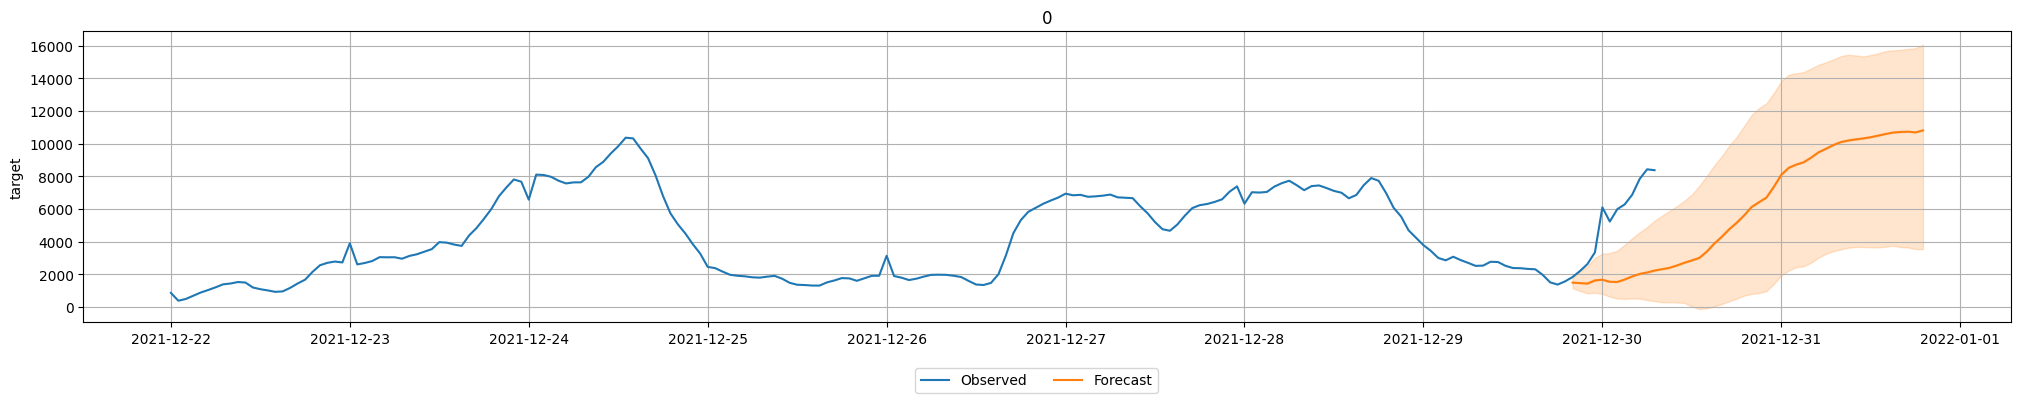

In [194]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

In [192]:
predictor.leaderboard(test_data)

data with frequency 'IRREG' has been resampled to frequency 'h'.
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\metrics\abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attribute instead.
  warnings.warn(
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\metrics\abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attribute instead.
  warnings.warn(


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,ChronosFineTuned[bolt_small],-0.705299,-0.850196,0.435850,0.202627,722.740342,2
1,ChronosZeroShot[bolt_small],-0.837318,-0.778634,0.910246,0.857998,0.049805,1


# Test World Stock Prices

In [198]:
data = TimeSeriesDataFrame.from_path(
    "worldstock.csv"
)
data.head()

,,target
item_id,timestamp,
peloton,2025-05-14,6.620000
amd,2025-05-14,117.720001
adidas,2025-05-14,124.440002
american express,2025-05-14,300.100006
puma,2025-05-14,25.545000


In [209]:
prediction_length = 20
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq="w").fit(
    train_data, presets="bolt_small", hyperparameters={"Chronos": {"fine_tune": True, "fine_tune_lr": 1e-4, "fine_tune_steps": 2000}},
    time_limit=900,
)

Sorting the dataframe index before generating the train/test split.
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\predictor.py:198: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  offset = pd.tseries.frequencies.to_offset(self.freq)
Frequency 'w' stored as 'W-SUN'
Beginning AutoGluon training... Time limit = 900s
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250515_205842'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       1.35 GB / 15.70 GB (8.6%)
Disk Space Avail:   59.76 GB / 475.50 GB (12.6%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'fine_tune': True,
             

data with frequency 'IRREG' has been resampled to frequency 'W-SUN'.
Model not specified in predict, will default to the model with the best validation score: Chronos[autogluon__chronos-bolt-small]
data with frequency 'IRREG' has been resampled to frequency 'W-SUN'.


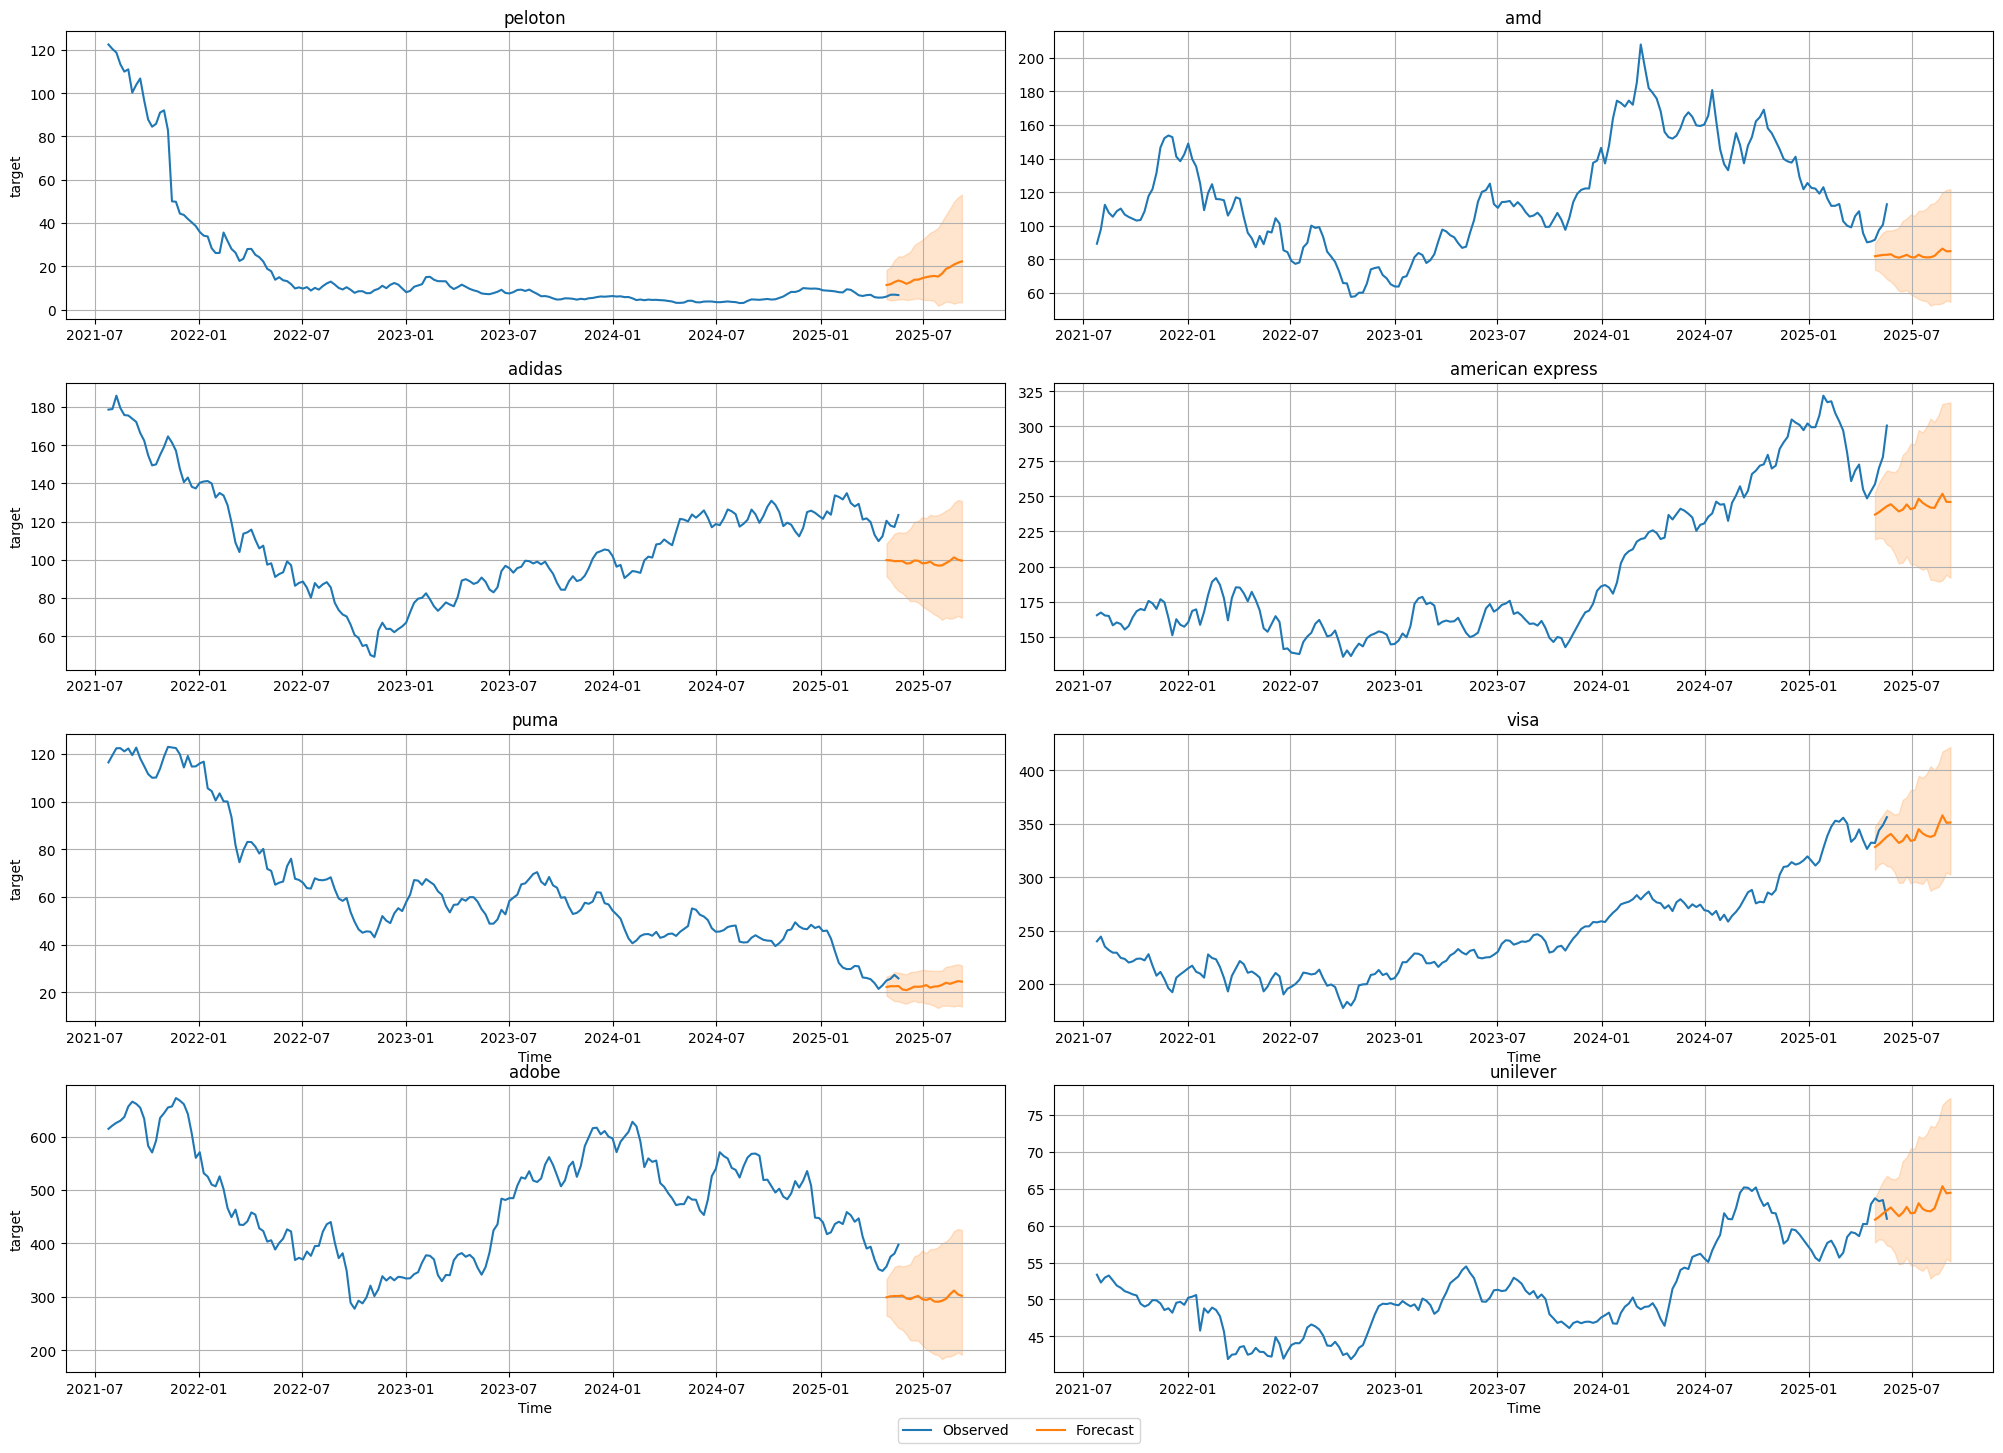

In [210]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:10],
    max_history_length=200,
);

# Test nur mit AMD-Stock

In [3]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data = TimeSeriesDataFrame.from_path(
    "worldstock-amd.csv"
)
data.head()

target
item_id timestamp             
amd     2025-05-14  117.720001
        2025-05-13  112.459999
        2025-05-12  108.120003
        2025-05-05  100.589996
        2025-05-02   98.800003

In [218]:
prediction_length = 20
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq="w").fit(
    train_data, presets="bolt_small",
)

Sorting the dataframe index before generating the train/test split.
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\predictor.py:198: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  offset = pd.tseries.frequencies.to_offset(self.freq)
Frequency 'w' stored as 'W-SUN'
Beginning AutoGluon training...
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250515_211416'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       2.33 GB / 15.70 GB (14.9%)
Disk Space Avail:   59.35 GB / 475.50 GB (12.5%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_

data with frequency 'IRREG' has been resampled to frequency 'W-SUN'.
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
data with frequency 'IRREG' has been resampled to frequency 'W-SUN'.


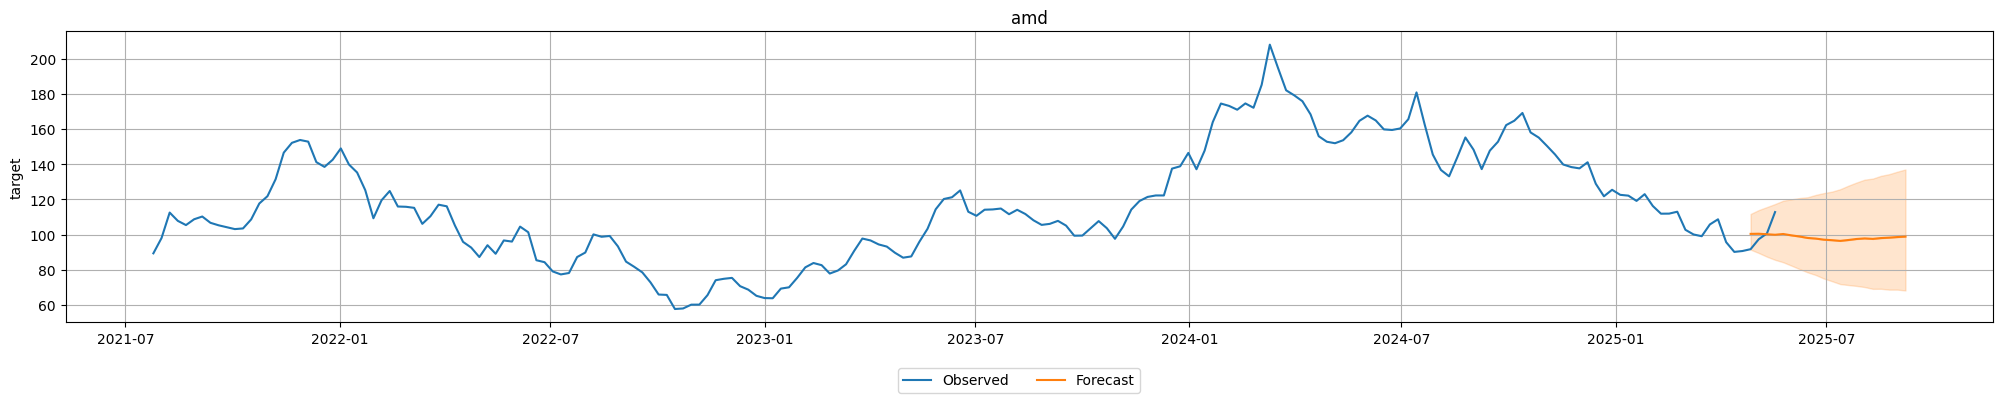

In [219]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:10],
    max_history_length=200,
);

## Finetuning - Bolt Small

In [ ]:
prediction_length = 20
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq="w").fit(
    train_data, presets="bolt_small", hyperparameters={"Chronos": {"fine_tune": True, "fine_tune_lr": 1e-4, "fine_tune_steps": 2000}},
    time_limit=900,
)

data with frequency 'IRREG' has been resampled to frequency 'W-SUN'.
Model not specified in predict, will default to the model with the best validation score: Chronos[autogluon__chronos-bolt-small]
data with frequency 'IRREG' has been resampled to frequency 'W-SUN'.


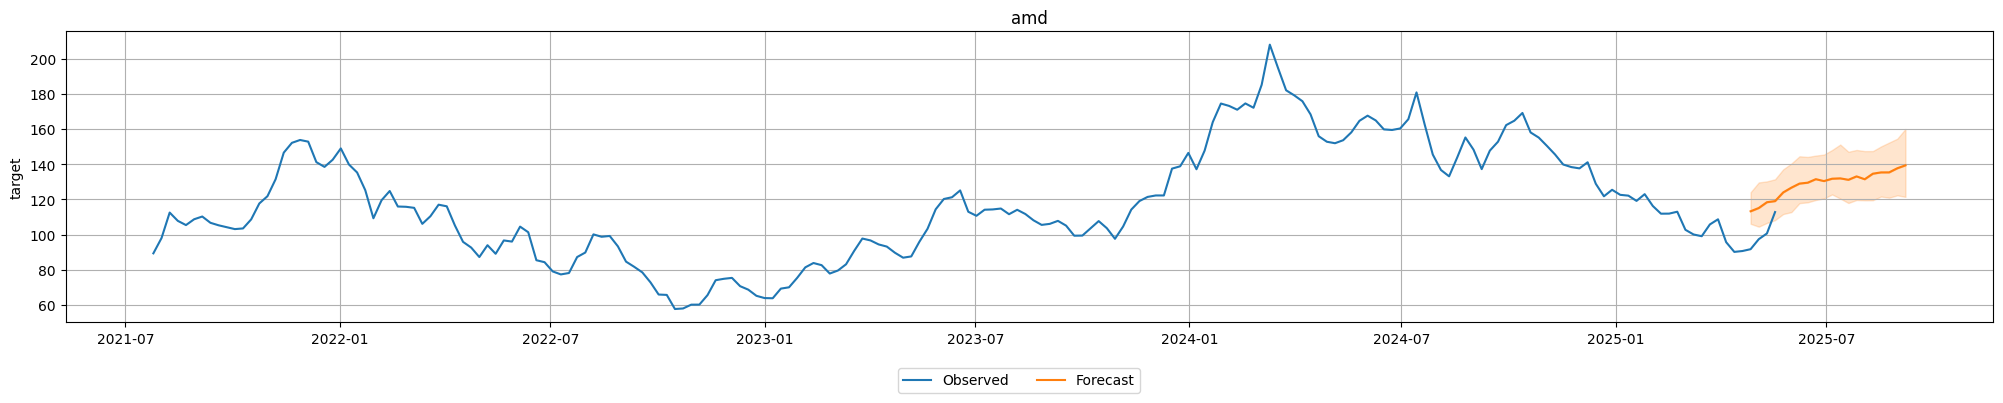

In [221]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:10],
    max_history_length=200,
);

## Finetuning - Bolt Base

In [225]:
prediction_length = 20
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq="w").fit(
    train_data, presets="bolt_base", hyperparameters={"Chronos": {"fine_tune": True, "fine_tune_lr": 1e-4, "fine_tune_steps": 2000}},
    time_limit=900,
)

Sorting the dataframe index before generating the train/test split.
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\predictor.py:198: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  offset = pd.tseries.frequencies.to_offset(self.freq)
Frequency 'w' stored as 'W-SUN'
Beginning AutoGluon training... Time limit = 900s
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250515_213306'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       3.19 GB / 15.70 GB (20.3%)
Disk Space Avail:   59.17 GB / 475.50 GB (12.4%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'fine_tune': True,
             

data with frequency 'IRREG' has been resampled to frequency 'W-SUN'.
Model not specified in predict, will default to the model with the best validation score: Chronos[autogluon__chronos-bolt-small]
data with frequency 'IRREG' has been resampled to frequency 'W-SUN'.


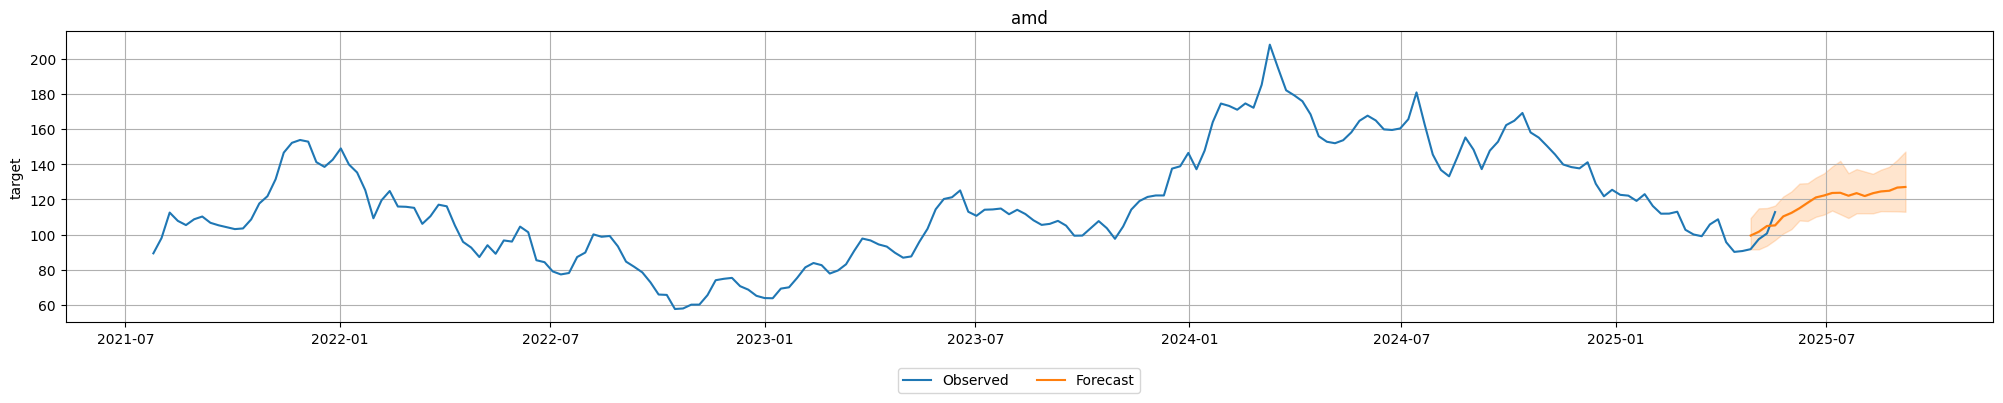

In [226]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:10],
    max_history_length=200,
);

# Ist noch mehr Fine Tuning möglich?

In [229]:
prediction_length = 20
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq="w").fit(
    train_data, presets="bolt_base", hyperparameters={"Chronos": {"fine_tune": True, "fine_tune_lr": 1e-3, "fine_tune_steps": 4000}},
    time_limit=1800,
)

Sorting the dataframe index before generating the train/test split.
c:\workspace\CrimeMap\CrimeMap_venv\Lib\site-packages\autogluon\timeseries\predictor.py:198: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  offset = pd.tseries.frequencies.to_offset(self.freq)
Frequency 'w' stored as 'W-SUN'
Beginning AutoGluon training... Time limit = 1800s
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250516_141939'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       1.38 GB / 15.70 GB (8.8%)
Disk Space Avail:   55.72 GB / 475.50 GB (11.7%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': {'Chronos': {'fine_tune': True,
             

data with frequency 'IRREG' has been resampled to frequency 'W-SUN'.
Model not specified in predict, will default to the model with the best validation score: Chronos[autogluon__chronos-bolt-small]
data with frequency 'IRREG' has been resampled to frequency 'W-SUN'.


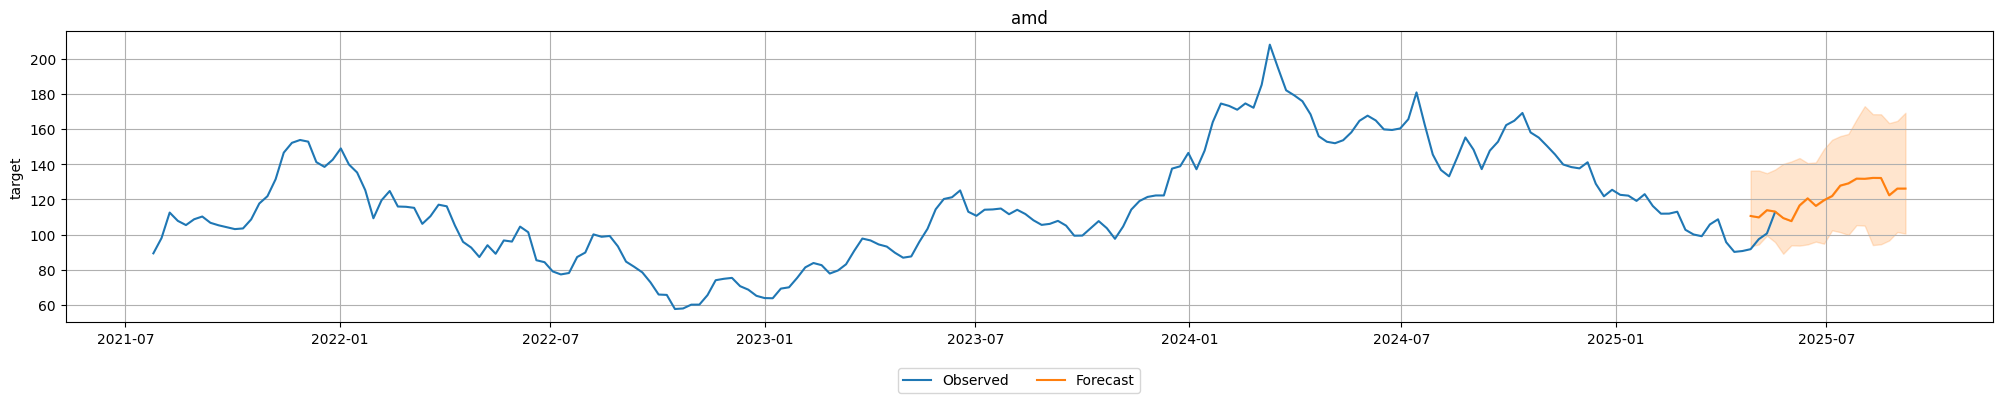

In [230]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:10],
    max_history_length=200,
);

In [5]:
prediction_length = 20
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length, freq="d").fit(
    train_data, presets="bolt_base", hyperparameters={"Chronos": {"fine_tune": True, "fine_tune_lr": 1e-3, "fine_tune_steps": 2000}},
    time_limit=300,
)

Sorting the dataframe index before generating the train/test split.
Frequency 'd' stored as 'D'
Beginning AutoGluon training... Time limit = 300s
AutoGluon will save models to 'c:\workspace\CrimeMap\AutogluonModels\ag-20250517_121256'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       1.32 GB / 15.70 GB (8.4%)
Disk Space Avail:   54.73 GB / 475.50 GB (11.5%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'fine_tune': True,
                                 'fine_tune_lr': 0.001,
                                 'fine_tune_steps': 2000}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 20,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'ran

data with frequency 'IRREG' has been resampled to frequency 'D'.
Model not specified in predict, will default to the model with the best validation score: Chronos[autogluon__chronos-bolt-small]
data with frequency 'IRREG' has been resampled to frequency 'D'.


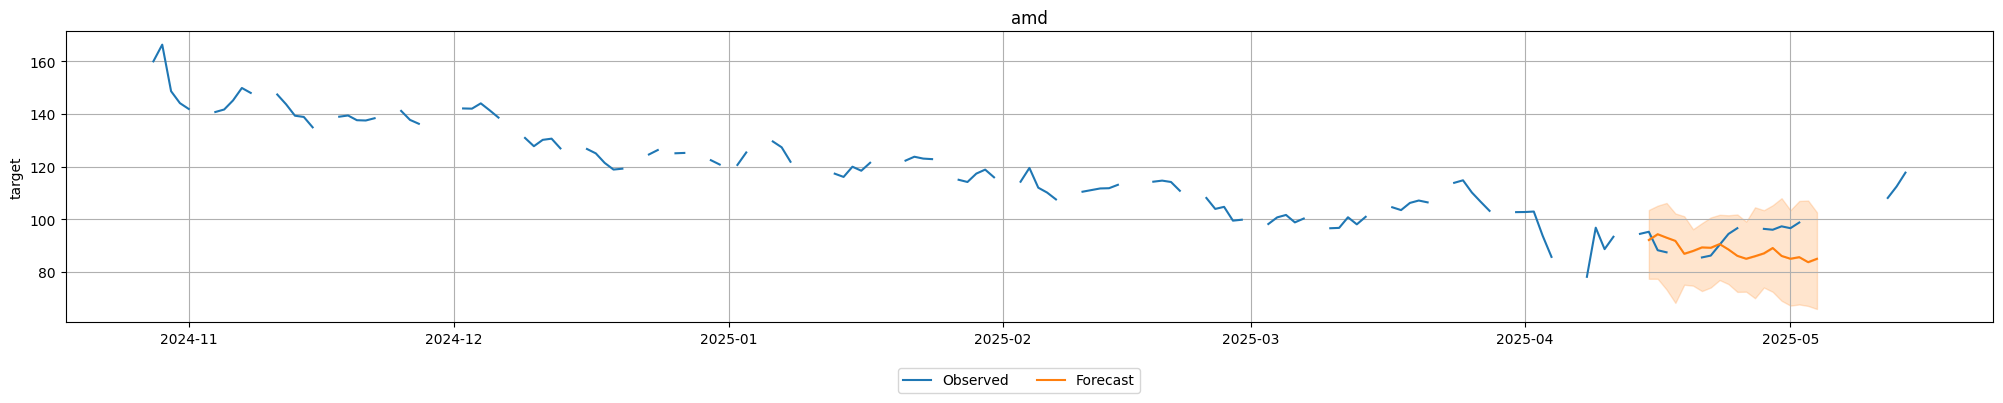

In [250]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:10],
    max_history_length=200,
);